In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn import neighbors

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# import Beautiful Soup, re, 
import bs4 as bs
import re
import hashlib
 
# download NLTK classifiers - these are cached locally on your machine
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# import ml classifiers
from nltk.tokenize import sent_tokenize # tokenizes sentences
from nltk.stem import PorterStemmer     # parsing/stemmer
from nltk.tag import pos_tag            # parts-of-speech tagging
from nltk.corpus import wordnet         # sentiment scores
from nltk.stem import WordNetLemmatizer # stem and context
from nltk.corpus import stopwords       # stopwords
from nltk.util import ngrams            # ngram iterator

# import word2vec
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize, FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer

# import datetime
import datetime as dt
from datetime import *
import time

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\九九\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\九九\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\九九\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\九九\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!pip install gensim==3.8.3 
!pip install category_encoders

In [3]:
def time_convert(sec):
    minute = sec // 60
    sec = sec % 60
    hour = minute // 60
    minute = minute % 60
    print("Time Lapsed = {0}:{1}:{2}".format(int(hour), int(minute), int(sec)))

# I. Import Dataset 

In [4]:
# Code to read csv file into Colaboratory: 
#from google.colab import files
#uploaded = files.upload()

In [5]:
start = time.time()

# We will use Titanic dataset to test our work first
import io
#df = pd.read_csv(io.BytesIO(uploaded['Classification-Titanic-train.csv']))
df = pd.read_csv('Classification-Titanic-train.csv')
display(df.head(), df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
for col in df.columns:
    print(col, df[col].unique())
    print("\n----------------------------------------------")

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [8]:
end = time.time()

time_lapsed = end - start
time_convert(time_lapsed)

Time Lapsed = 0:0:0


# II. Data Pre-processing

Check the missing values


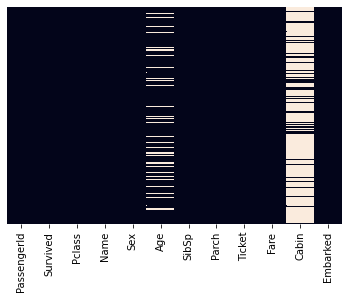

The missing Proportion for each column
PassengerId: 0.000000 
Survived: 0.000000 
Pclass: 0.000000 
Name: 0.000000 
Sex: 0.000000 
Age: 0.198653 
SibSp: 0.000000 
Parch: 0.000000 
Ticket: 0.000000 
Fare: 0.000000 
Cabin: 0.771044 
Embarked: 0.002245 
Time Lapsed = 0:0:0


In [9]:
# Check the missing Values on dataset
print("Check the missing values")
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
plt.show()

# Print the missing proportion for each column 
df_ = df.isnull()

print("The missing Proportion for each column")
for col_name in df_.columns:
    print(col_name + ": %f " % df_[col_name].mean())

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Cabin is dropped because its missing proportion is > 50% 

Check the missing values after pre-processing


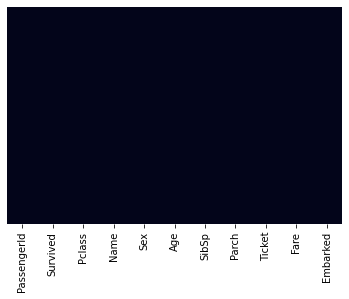

Time Lapsed = 0:0:0


In [10]:
# + automatically drop the column if its missing proportion is higher than 50%
# + replce the missing values with median 

Train = df.copy(deep = True)   # Copy dataset -> so this section can be ran more than once after dropping certain column

for col_name in df_.columns:    
    if df_[col_name].mean() >= 0.5:  # Drop the column if its missing proportion > 50%
        Train = Train.drop(columns = [col_name])
        print(col_name + " is dropped because its missing proportion is > 50%", "\n")
       
    elif df_[col_name].mean() > 0:   # Handle missing values
        Train.fillna(Train.median(), inplace = True)

# Re-check the missing Values on dataset - should be no missing proportion
print("Check the missing values after pre-processing")
sns.heatmap(Train.isnull(), yticklabels = False, cbar = False)
plt.show()
train_ = Train.isnull()

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

1. Datatype conversion function：Number -> String or String -> Number (eg. when "Age" is an object, user might want to convert it into number)

In [11]:
# codes here (we need this to be done after we apply dummy function to our df)
def astype_inplace(df, dct):
    df[list(dct.keys())] = df.astype(dct)[list(dct.keys())]
    return df 

print("Please enter the column names that you want to convert datatype or enter NA if you don't need it","\n")
col_names = input("Input a column name and convert type (eg. Fare int) ") 

while True:
    if col_names == "NA":
        print("Skip datatype conversion") 
        break
    else:
        col_names_ = col_names.split()
        Train = astype_inplace (Train, {col_names_[0]: col_names_[1]})
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column names that you want to convert datatype or enter NA if you don't need it 

Input a column name and convert type (eg. Fare int) Fare int


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S


Time Lapsed = 0:0:5


2. Extraction function: Extract numbers from a string(letter + numbers) or extract letters from a string (letter + number)

In [13]:
# Extract numbers from a string(letter + numbers)
def extract_numbers_from_string(df, col_name):
    new_list = []
    list = df[col_name]
    for string in list:
        new_data = ''.join(filter(str.isdigit, string))
        new_list.append(new_data)
        pd.Series(new_list)
    df[col_name + "_w_number"] = new_list 
    df[col_name + "_w_number"] = pd.to_numeric(df[col_name + "_w_number"])
    return df

print("Please enter the column name that you want to extract numbers from a string or enter NA if you don't need it","\n")
col_name = input("Input a column name ")  # Use NA for this dataset; if you try ticket, remember to drop the new ticket_w_number
while True:
    if col_name == "NA":
        print("Skip exctracting numbers from a string ")
        break
    else:
        Train = extract_numbers_from_string(Train, col_name)
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to extract numbers from a string or enter NA if you don't need it 

Input a column name Ticket


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_w_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S,521171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S,23101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,S,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S,373450.0


Time Lapsed = 0:0:15


In [14]:
# Extract letters from a string(letter + numbers)
def extract_letters_from_string(df, col_name):
    new_list = []
    list = df[col_name]
    for string in list:
        new_data = " ".join(re.split("[^a-zA-Z]*", string))
        new_list.append(new_data)
        pd.Series(new_list)
    df[col_name + "_w_letter"] = new_list 
    return df

print("Please enter the column name that you want to extrac letters from a string or enter NA if you don't need it","\n")
col_name = input("Input a column name ") # Use NA for this dataset
while True:
    if col_name == "NA":
        print("Skip exctracting letters from a string ")
        break
    else:
        Train = extract_letters_from_string(Train, col_name)
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to extrac letters from a string or enter NA if you don't need it 

Input a column name Ticket


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_w_number,Ticket_w_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S,521171.0,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,17599.0,P C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S,23101282.0,S T O N O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,S,113803.0,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S,373450.0,


Time Lapsed = 0:0:26


3. Pre-process timestamp

In [15]:
def date_time(df):
    df['Year'] = df['timestamp'].apply(lambda x : x.year)
    df['Month'] = df['timestamp'].apply(lambda x : x.month)
    df['Day'] = df['timestamp'].apply(lambda x : x.day)
    df['DayOfWeek'] = df['timestamp'].apply(lambda x : x.dayofweek)
    df['week'] = df['timestamp'].apply(lambda x : x.week)
    return df


print("Please enter NA if you don't need date time pre-processing","\n")
col_name = input("Input a column name ") # Use NA for this dataset
while True:
    if col_name == "NA":
        print("Skip pre-process date time")
        break
    else:
        Train = date_time(Train)
        display(Train.head())
        break
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter NA if you don't need date time pre-processing 

Input a column name NA
Skip pre-process date time
Time Lapsed = 0:0:28


4. String Clean-up:

In [16]:
def string_cleaner(data, col_name):
    '''
        Clean and preprocess a strings.
            1. Remove HTML tags
            2. Extract emoticons
            3. Use regex to remove all special characters (only keep letters)
    '''
    #1. Remove HTML tags
    data[col_name] = data[col_name].apply(lambda x: bs.BeautifulSoup(x).text)
    
    #2. Use regex to find emoticons
    emoticons = data[col_name].apply(lambda x: re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', x))
    #print(emoticons)
      
    #3. Remove punctuation (keep only letters and digits)
    data[col_name] = data[col_name].apply(lambda x: re.sub("[^a-zA-Z0-9]", "", x))
    
    return data

print("Please enter the column name that you want to clean up string or enter NA if you don't need it","\n")
col_name = input("Input a column name ") # Use NA for this dataset
while True:
    if col_name == "NA":
        print("Skip string clean-up")
        break
    else:
        Train = string_cleaner(Train, col_name) # try "Ticket"
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to clean up string or enter NA if you don't need it 

Input a column name Ticket


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_w_number,Ticket_w_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A521171,7,S,521171.0,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC17599,71,C,17599.0,P C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO23101282,7,S,23101282.0,S T O N O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,S,113803.0,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S,373450.0,


Time Lapsed = 0:0:32


5. Allow users to drop columns

In [17]:
def drop_columns(df, col):
    return df.drop(col, axis = 1)

print("Please enter the column names that you want to drop or enter NA if you don't need it","\n","Example:Ticket PassengerId" )
col_names = input("Input column names ") # should drop Ticket PassengerId Ticket_w_number Ticket_w_letter for this dataset
while True:
    if col_names == "NA":
        print("Skip dropping columns ")
        break
    else:
        col_names_ = col_names.split()
        Train = drop_columns(Train, col_names_) 
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column names that you want to drop or enter NA if you don't need it 
 Example:Ticket PassengerId
Input column names Ticket PassengerId Ticket_w_number Ticket_w_letter


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8,S


Time Lapsed = 0:0:38


# III. Visualization for exploratory data analysis (EDA)

1. Distribution plot

Please enter the column name that you want a distribution plot for
Input a column name Age


c:\software\anaconda3\envs\great_expectations_dev\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Time Lapsed = 0:0:42


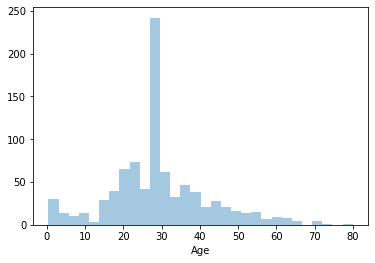

In [18]:
# Visulization: Plot the distributionn plot for the column user selected
print("Please enter the column name that you want a distribution plot for")
col_name = input("Input a column name ")  # try Age
sns.distplot(Train[col_name].dropna(), kde = False, bins = 30)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

2. Count plot

Please enter the column name that you want a count plot for
Input a column name Pclass
Time Lapsed = 0:0:46


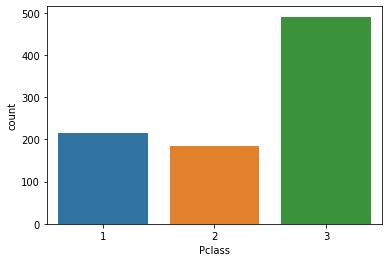

In [19]:
print("Please enter the column name that you want a count plot for")
col_name = input("Input a column name ")  # try Pclass
sns.countplot(x = col_name, data = Train)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

# IV. Feature Transformation

1. Fourier Transform

In [20]:
from scipy.fftpack import fft

def fourier_transformation(data):
    try:
        ft = fft(data.values)
        ft_real = ft.real
        ft_imag = ft.imag
        ft_abs = abs(ft)
        ft_real_norm = (ft_real - np.min(ft_real)) / (np.max(ft_real) - np.min(ft_real))
        ft_imag_norm = (ft_imag - np.min(ft_imag)) / (np.max(ft_imag) - np.min(ft_imag))
        return ft_real_norm, ft_imag_norm
    except:
        print("FFT ERROR!")

print("Please enter the column name that you want a Fourier transformation or enter NA if you don't want it","\n")
col_name = input("Input a column name ") # Try Fare      
while True:
    if col_name == "NA":
        print("Skip Fourier transformation")
        break
    else:
        Train[col_name + "_FFT_real"], Train[col_name + "_FFT_imag"] = fourier_transformation(Train[col_name])
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want a Fourier transformation or enter NA if you don't want it 

Input a column name Fare


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_FFT_real,Fare_FFT_imag
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7,S,1.000000,0.500000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71,C,0.047551,0.549173
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7,S,0.029860,0.807200
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53,S,0.113304,0.307363
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8,S,0.049518,0.123676


Time Lapsed = 0:0:50


2. Get Dummies

In [21]:
#get dummies
#Use for nominal data
def get_dummy(data, column):
    new_data = pd.get_dummies(data, columns = column)
    return new_data

print("Please enter the column names that you want to get dummies for or enter NA if you don't need it","\n", "Example:Sex Embarked")
col_names = input("Input a column name ") # should be Embarked for this dataset  
while True:
    if col_names == "NA":
        print("Skip get dummies")
        break
    else:
        col_names_new = col_names.split()
        Train = pd.get_dummies(Train, columns = col_names_new)
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column names that you want to get dummies for or enter NA if you don't need it 
 Example:Sex Embarked
Input a column name Embarked


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Fare_FFT_real,Fare_FFT_imag,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7,1.000000,0.500000,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71,0.047551,0.549173,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7,0.029860,0.807200,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53,0.113304,0.307363,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8,0.049518,0.123676,0,0,1


Time Lapsed = 0:0:56


4. Labelbinarizer

In [22]:
# LabelBinarizer
# Binary nominal data
# convert categorical features with binary values to integer values of 0 or 1

from sklearn.preprocessing import LabelBinarizer

def BinaryColumnConvertToInt(data, column):
    if data[column].nunique() != 2: #Another approach: use assert
        print("The column is not binary")
        return
    # binarizer object for each binary categorical variable
    binarizer = LabelBinarizer()
    # Fit and transform each respective binary variable to their respective binarizer objects
    data[column] = binarizer.fit_transform(data[column])
    return data

print("Please enter the column names that you want to apply labelbinarizer or enter NA if you don't need it","\n", "Example:'Sex'")
col_names = input("Input a column name ") 

while True:
    if col_names == "NA":
        print("Skip labelbinarizer")   # Should be NA for this dataset
        break
    else:
        Train = BinaryColumnConvertToInt(Train, col_names)
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column names that you want to apply labelbinarizer or enter NA if you don't need it 
 Example:'Sex'
Input a column name Sex


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Fare_FFT_real,Fare_FFT_imag,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7,1.000000,0.500000,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71,0.047551,0.549173,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7,0.029860,0.807200,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53,0.113304,0.307363,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8,0.049518,0.123676,0,0,1


Time Lapsed = 0:0:58


5. Ordinal Encoder

In [23]:
#Ordinal Encoding for ordinal data
#Encoder ordinal value in ascending order eg. Highschool, college, masters
#Result: Highschool->0, college->1, masters->2

import category_encoders as ce

def ordinal_encode(df, col, name):
    # create object of Ordinalencoding
    col_dict = {}
    for i in np.arange(0, len(name)):
        col_dict[name[i]] = i + 1
        
    print(col_dict)
    encoder = ce.OrdinalEncoder(cols = [col], return_df = True,
                               mapping = [{'col' : col, 'mapping' : col_dict}])
    df_train_transformed = encoder.fit_transform(df)
    return df_train_transformed

print("Please enter the column name and ordinal values that you want to encode or enter NA if you don't need it","\n" )
col_name = input("Input column name")
ordinal_val = input("ordinal value in ascending order")

lst = []
Train_copy = Train.copy()
while True:
    if col_name == "NA":
        print("Skip ordinal encoder")
        break
    else:
        ordinal_val_ = ordinal_val.split()
        for word in ordinal_val_:
            lst.append(word)
        Train = ordinal_encode(Train, col_name, lst)
        display(Train)
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name and ordinal values that you want to encode or enter NA if you don't need it 

Input column nameNA
ordinal value in ascending orderNA
Skip ordinal encoder
Time Lapsed = 0:1:19


6. Log Transformation


In [24]:
#Log transformation; data and column will be passed into function
def log_transformation(data, col):
    data["log_" + col] = np.log(data[col])
    data.drop([col], axis = 1, inplace = True)
    return data

print("Please enter the column name that you want to apply log transformation(both data and column) or enter NA if you don't need it","\n")
col_names = input("Input a column name ") 

while True:
    if col_names == "NA":
        los_tranformed = False #To generate evaluation method later
        print("Skip log transformation")   # Should be NA for this dataset
        break
    else:
        Train = log_transformation(Train, col_names)
        log_transformed = True #To generate evaluation method later
        display(Train.head())
        break

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to apply log transformation(both data and column) or enter NA if you don't need it 

Input a column name NA
Skip log transformation
Time Lapsed = 0:1:40


In [25]:
#Log transformation; only column will be passed into function
def log_transformation_col(col):
    return np.log(col)

print("Please enter the column name that you want to apply log transformation(only column) or enter NA if you don't need it","\n")
col_name = input("Input a column name ") 

while True:
    if col_name == "NA":
        log_transformed = False #To generate evaluation method later
        print("Skip log transformation")   # Should be NA for this dataset
        break
    else:
        display(log_transformation_col(col_name))
        log_transformed = True #To generate evaluation method later
        break
        
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to apply log transformation(only column) or enter NA if you don't need it 

Input a column name NA
Skip log transformation
Time Lapsed = 0:1:42


7. A bag of word

In [26]:
# Clean, tokenize and lemmatize a text.
ps = PorterStemmer()
wnl = WordNetLemmatizer()
eng_stopwords = set(stopwords.words("english"))

def text_cleaner(text, lemmatize = True, stem = False):
    if lemmatize == True and stem == True:
        raise RuntimeError("May not pass both lemmatize and stem flags")

    #1. Remove HTML tags
    text = bs.BeautifulSoup(text).text

    #2. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)

    #3. Remove punctuation
    text = re.sub("[^a-zA-Z]", " ", text)

    #4. Tokenize into words (all lower case)
    text = text.lower().split()
    
    #5. Remove stopwords, Lemmatize, Stem
    eng_stopwords = set(stopwords.words("english"))
    text = [w for w in text if not w in eng_stopwords]
    text_wnl = []
    wnl = WordNetLemmatizer()
    for w in text:
        text_wnl.append(wnl.lemmatize(w)) 
    #6. Join the review to one sentence
    text_processed = ' '.join(text_wnl + emoticons)
    
    return text_processed

# Use text_cleaner function to clean, tokenize and lemmatize texts in the table .
def table_text_clean(df, col_name):
    for row_name in df.index:
        text_clean = text_cleaner(text = df.at[row_name, col_name], lemmatize = True, stem = False)
        df.at[row_name, col_name] = text_clean
    return df
    
# Vectorize the text using a bag of words model
def get_vectorizer(ngram, max_features):
    return CountVectorizer(ngram_range = (1, ngram),
                             analyzer = "word",
                             tokenizer = None,
                             preprocessor = text_cleaner,
                             stop_words = None, 
                             max_features = max_features)

def bag_of_word(df, col_name):
    vectorizer = get_vectorizer(ngram = 2, max_features = 100)  #set 100 as maximum features (identify maximum 100 different word, and count frequency)
    # Get feature names(each different word),and turn features into an array of frequency
    df_cleaned = table_text_clean(df, col_name)
    v = vectorizer.fit_transform(df_cleaned[col_name])
    bag_of_word_features = pd.DataFrame(data = v.toarray(), columns = vectorizer.get_feature_names()) 
    # Combine the created features with Train dataset
    df_w_features = pd.concat([df_cleaned, bag_of_word_features], axis = 1, join = 'inner')
    return df_w_features

print("Please enter the column name that you want to apply a bag of word model or enter NA if you don't want it","\n")
col_name = input("Input a column name ") # Should be Name for this dataset      
while True:
    if col_name == "NA":
        print("Skip a bag of word model")
        break
    else:
        Train = bag_of_word(Train, col_name) #try Name
        display(Train.head())
        break
        
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to apply a bag of word model or enter NA if you don't want it 

Input a column name Name


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Fare_FFT_real,Fare_FFT_imag,...,samuel,skoog,sofia,thomas,van,victor,walter,william,william john,williams
0,0,3,braund mr owen harris,1,22.0,1,0,7,1.000000,0.500000,...,0,0,0,0,0,0,0,0,0,0
1,1,1,cumings mr john bradley florence briggs thayer,0,38.0,1,0,71,0.047551,0.549173,...,0,0,0,0,0,0,0,0,0,0
2,1,3,heikkinen miss laina,0,26.0,0,0,7,0.029860,0.807200,...,0,0,0,0,0,0,0,0,0,0
3,1,1,futrelle mr jacques heath lily may peel,0,35.0,1,0,53,0.113304,0.307363,...,0,0,0,0,0,0,0,0,0,0
4,0,3,allen mr william henry,1,35.0,0,0,8,0.049518,0.123676,...,0,0,0,0,0,0,0,1,0,0


Time Lapsed = 0:1:50


8. Word2Vec


In [27]:
# Given a set of texts (each one a list of words), calculate the average feature vector for each one 
def get_avg_feature_vecs(df, col_name):
    Table_cleaned = table_text_clean(df, col_name) # Use table_text_cleaner function to clean, tokenize and lemmatize texts in table
    model = Word2Vec(sentences = Table_cleaned[col_name], size = 100, window = 5, min_count = 1, workers = 4) #Initialize the model
    
    # Index2word is a list that contains the names of the words in the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    
    textFeatureVecs = []
    # Loop through the texts
    for counter, text in enumerate(Table_cleaned[col_name]):

        # Function to average all of the word vectors in a given paragraph
        featureVec = []

        # Loop over each word in the text and, if it is in the model's vocaublary, add its feature vector to the total        
        for n,word in enumerate(text):
            if word in index2word_set: 
                featureVec.append(model.wv[word])
        
        # Average the word vectors
        featureVec = np.mean(featureVec, axis = 0).reshape(1, -1)

        textFeatureVecs.append(featureVec)
        word2vec_features = pd.DataFrame(data = np.concatenate(textFeatureVecs, axis = 0))
        df_w_features = pd.concat([Table_cleaned, word2vec_features], axis = 1, join = 'inner')
    return df_w_features

print("Please enter the column name that you want to apply Word2Vec model or enter NA if you don't want it","\n")
col_name = input("Input a column name ") # Should be NA for this dataset     

while True:
    if col_name == "NA":
        print("Skip Word2Vec model")
        break
    else:
        Train_ = df.copy(deep = True)                
        # A certain column will use either bag of word or Word2Vec to transform features. 
        # To test the code in this section is working, Word2Vec is applied to "Name" in Train_ instead of Train. 
        Train_ = get_avg_feature_vecs(Train_, col_name)
        display(Train_.head())
        break
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to apply Word2Vec model or enter NA if you don't want it 

Input a column name Name


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,90,91,92,93,94,95,96,97,98,99
0,1,0,3,braund mr owen harris,male,22.0,1,0,A/5 21171,7.2500,...,0.076573,-0.040767,0.382830,0.035842,0.118976,0.184098,-0.063604,0.105189,0.115919,0.063277
1,2,1,1,cumings mr john bradley florence briggs thayer,female,38.0,1,0,PC 17599,71.2833,...,0.076365,-0.040927,0.383054,0.035899,0.118404,0.183592,-0.064272,0.104623,0.115709,0.063359
2,3,1,3,heikkinen miss laina,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.076223,-0.040553,0.382436,0.035435,0.118811,0.184151,-0.064617,0.105270,0.116722,0.064805
3,4,1,1,futrelle mr jacques heath lily may peel,female,35.0,1,0,113803,53.1000,...,0.075831,-0.041824,0.379992,0.035243,0.117355,0.181840,-0.063077,0.103351,0.113517,0.062292
4,5,0,3,allen mr william henry,male,35.0,0,0,373450,8.0500,...,0.075801,-0.041503,0.383814,0.034825,0.118606,0.183954,-0.064154,0.104817,0.114517,0.063589


Time Lapsed = 0:1:58


# V. Feature Engineering & Selection

1. Feature Scaling


In [28]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
def normalization(X_train, X_test):
    norm = MinMaxScaler().fit(X_train)
    
    # transform training data
    X_train_norm = norm.transform(X_train)
    
    # transform testing dataabs
    X_test_norm = norm.transform(X_test)
    
    return X_train_norm, X_test_norm

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Time Lapsed = 0:1:58


In [29]:
#Feature Scaling for numeric columns in x train and x test
from sklearn.preprocessing import StandardScaler

def standard_scaler(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()

    sc = StandardScaler()
    x_train_numeric = X_train.select_dtypes(include = ["int64", "float64"])
    tr_col = x_train_numeric.columns
    x_test_numeric = X_test.select_dtypes(include = ["int64", "float64"])
    test_col = x_test_numeric.columns

    x_train_numeric = pd.DataFrame(sc.fit_transform(x_train_numeric))
    x_test_numeric = pd.DataFrame(sc.transform(x_test_numeric))

    x_train_numeric.set_index(X_train.index, inplace = True)
    x_train_numeric.columns = tr_col
    x_test_numeric.set_index(X_test.index, inplace = True)
    x_test_numeric.columns = test_col

    X_train[tr_col] = X_train_numeric[tr_col]
    X_test[test_col] = X_test_numeric[test_col]

    display("X_train", X_train.head(), "X_test", X_test.head())

    return X_train, X_test

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Time Lapsed = 0:1:58


2. Remove outliers


Please enter the column name that you want to plot distribution 

Input a column name Age


c:\software\anaconda3\envs\great_expectations_dev\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\software\anaconda3\envs\great_expectations_dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Time Lapsed = 0:2:27


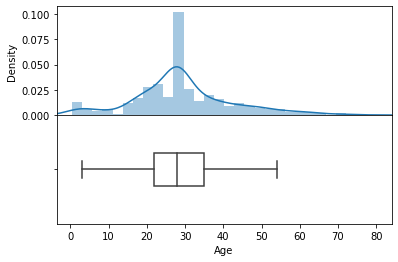

In [30]:
def plot_distribution(data, column):
    """Plot kernel density estimate with histogram and boxplot for determining outliers"""
    fig, axs = plt.subplots(nrows = 2)

    sns.distplot(
        data[column], 
        ax = axs[0]
    )
    sns.boxplot(
        data[column],
        width = 0.3, 
        ax = axs[1],
        showfliers = False,
    )

    # Align axes
    add_space = np.max(data[column]) * 0.05
    min_val = np.min(data[column]) - add_space
    max_val = np.max(data[column]) + add_space
    axs[0].set_xlim((min_val, max_val))
    axs[1].set_xlim((min_val, max_val))

    # Put the two plots together
    plt.subplots_adjust(hspace = 0)

    # Adjust boxplot fill to be white
    axs[1].artists[0].set_facecolor('white')


print("Please enter the column name that you want to plot distribution","\n")
#data = input("Input data")
col_name = input("Input a column name ") # Try Age  
while True:
    if col_name == "NA":
        print("Skip plot distribution")
        break
    else:
        plot_distribution(Train, col_name)
        break
        
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [31]:
#remove outliers
def remove_outliers(data, column, lower = -np.inf, upper = np.inf):
    """
    Input:
      data (data frame): a data frame to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:s
      a data frame with outliers removed
    """
    lower = int(lower)
    upper = int(upper)
    print("Initial numeric data size is : ", data.shape)
    num = len(data)
    data = data[(data[column] >= lower) & (data[column] <= upper) ]
    print(column, "removed", num - len(data))
    print("The data size after removing outliers : ", data.shape)
    return data

print("Please enter the column name that you want to remove outlier or enter NA if you don't want it","\n")
col_name = input("Input a column name ")   # Should be NA for this dataset  

while True:
    if col_name == "NA":
        print("Skip removing outlier")
        break
    else:
        lower = input("Input lower boundary")
        upper = input("Input upper boundary")
        Train = remove_outliers(Train, col_name, lower, upper)
        display(Train.head())
        #y_train_outlier_removed = y_train_reg.loc[x_train_outlier_removed.index] #should match len(y value)?
        break
        
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want to remove outlier or enter NA if you don't want it 

Input a column name NA
Skip removing outlier
Time Lapsed = 0:2:40


3. Choosing Top Features

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace = True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

def best_features(df):
    list_f = list(df.columns)
    
    #Independent Column
    x = df.iloc[:, df.columns != list_f[1]]
    
    #Target Column
    y = df.iloc[:, df.columns.get_loc(list_f[1])]
    
    #Apply SelectKBest class to extract top 5 best features
    bestfeatures = SelectKBest(score_func = chi2, k = 3)
    fit = bestfeatures.fit(x,y)
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(x.columns)
    
    
    #Concat two dataframes for better visualization  
    featureScores = pd.concat([df_columns,df_scores], axis = 1)

    #Naming the dataframe columns
    featureScores.columns = ['Specs','Score'] 
    data_twenty = featureScores.nlargest(20,'Score')
    print(data_twenty) 
    return (data_twenty['Specs'])

#Train = Train.drop(["PassengerId"], axis = 1)
a = Train.select_dtypes(exclude = 'object')
b = clean_dataset(a)
best_col = best_features(a)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

              Specs         Score
5              Fare  24440.950919
2               Age    606.007867
8        Embarked_C     64.781263
0          Survived     63.396246
9        Embarked_Q     45.951941
96              rev     23.054348
101          samuel     18.999412
3             SibSp     17.764047
109    william john     14.479074
27          charles     13.963844
10       Embarked_S     12.671649
32            edith     11.489944
99           robert     11.326575
75       mr charles     11.202389
35        elizabeth     10.580650
31               dr     10.499224
107          walter      9.168478
78        mr george      9.136678
51            johan      9.034435
68   miss elizabeth      8.562933
Time Lapsed = 0:2:40


c:\software\anaconda3\envs\great_expectations_dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4. Adding top interaction features

In [33]:
#Interaction feature
from itertools import combinations

def top_interaction(data, numeric_col, number, y_train):
    """
    Use this function only to linear regression modeling
    This function should be only applied to numerical columns and after preprocessing is done to y_train
    data: dataframe
    numeric_col: numeric column of dataFrame
    number: number of top interactions in pair to be added to the dataframe
    y_train: response variable in training data
    """
    data_numeric = data[numeric_col]
    interactions = list(combinations(data_numeric.columns, 2))
    print(interactions)

    interaction_dict = {}
    for interaction in interactions:
        data_int = data_numeric.copy()
        data_int['interaction'] = data_int[interaction[0]] * data_int[interaction[1]]
    
        lr_int = LinearRegression()
        lr_int.fit(data_int, y_train)
        interaction_dict[lr_int.score(data_int, y_train)] = interaction
    print(interaction_dict)

    top = sorted(interaction_dict.keys(), reverse = True)
    interaction_top_dict = []
    for interaction in top:
        interaction_top_dict.append(interaction_dict.get(interaction))
        if str(len(interaction_top_dict)) == number:
            break

  # Add the top interaction features (which exclude a categorical variable)
    data_final = data.copy()
    for interaction in interaction_top_dict:
        col_name = interaction[0] + "*" + interaction[1]
        data_final[col_name] = data_final[interaction[0]] * data_final[interaction[1]]

    return data_final

print("Please enter the numerical column names that you want to apply top_interaction function or enter NA if you don't want it","\n")
col_names = input("Input a column name ")   # Use Parch Pclass Age for this dataset 

while True:
    if col_names == "NA":
        print("Skip top_interaction")
        break
    else:
        num = input("Input number of features to be added") #2
        y_train = input("Input response(predict) variable") #Survive
        col_names = list(col_names.split())
        Train = top_interaction(Train, col_names, num, Train[y_train])
        display(Train.head())
        break
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the numerical column names that you want to apply top_interaction function or enter NA if you don't want it 

Input a column name Parch Pclass Age
Input number of features to be added3
Input response(predict) variableSurvived
[('Parch', 'Pclass'), ('Parch', 'Age'), ('Pclass', 'Age')]
{0.15644762115919753: ('Parch', 'Pclass'), 0.1555105519293032: ('Parch', 'Age'), 0.15428116808619408: ('Pclass', 'Age')}


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Fare_FFT_real,Fare_FFT_imag,...,thomas,van,victor,walter,william,william john,williams,Parch*Pclass,Parch*Age,Pclass*Age
0,0,3,braund mr owen harris,1,22.0,1,0,7,1.000000,0.500000,...,0,0,0,0,0,0,0,0,0.0,66.0
1,1,1,cumings mr john bradley florence briggs thayer,0,38.0,1,0,71,0.047551,0.549173,...,0,0,0,0,0,0,0,0,0.0,38.0
2,1,3,heikkinen miss laina,0,26.0,0,0,7,0.029860,0.807200,...,0,0,0,0,0,0,0,0,0.0,78.0
3,1,1,futrelle mr jacques heath lily may peel,0,35.0,1,0,53,0.113304,0.307363,...,0,0,0,0,0,0,0,0,0.0,35.0
4,0,3,allen mr william henry,1,35.0,0,0,8,0.049518,0.123676,...,0,0,0,0,1,0,0,0,0.0,105.0


Time Lapsed = 0:3:2


In [34]:
# only use this function to real world test data only after you apply top_interaction to train data
def top_interaction_test(data, numeric_col, number):
    data_final = data.copy()
    count = 0
    num = 1
    while True:
        print(count, count+1)
        col_name = numeric_col[count] + "*" + numeric_col[count+1]
        data_final[col_name] = data_final[numeric_col[count]] * data_final[numeric_col[count+1]]
        if num == int(number):
            break
        num += 1
        count += 2
    
    return data_final

print("Warning: use this function to test data only when you applied top_interaction to train data\n")
print("Please enter the numerical column names from top_interaction function or enter NA if you don't want it","\n")
col_names = input("Input column names ")

while True:
    if col_names == "NA":
        print("Skip top_interaction_test")
        break
    else:
        num = input("Input number of features to be added")
        col_names = list(col_names.split())
        Train = top_interaction_test(Train, col_names, num)
        display(Train.head())
        break
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)


Please enter the numerical column names from top_interaction function or enter NA if you don't want it 

Input column names NA
Skip top_interaction_test
Time Lapsed = 0:3:9


# VI. Feature Visualization


# 1. Choosing Top 20 Features to visualize

1. Visualize correlations between top 20 features


Time Lapsed = 0:3:10


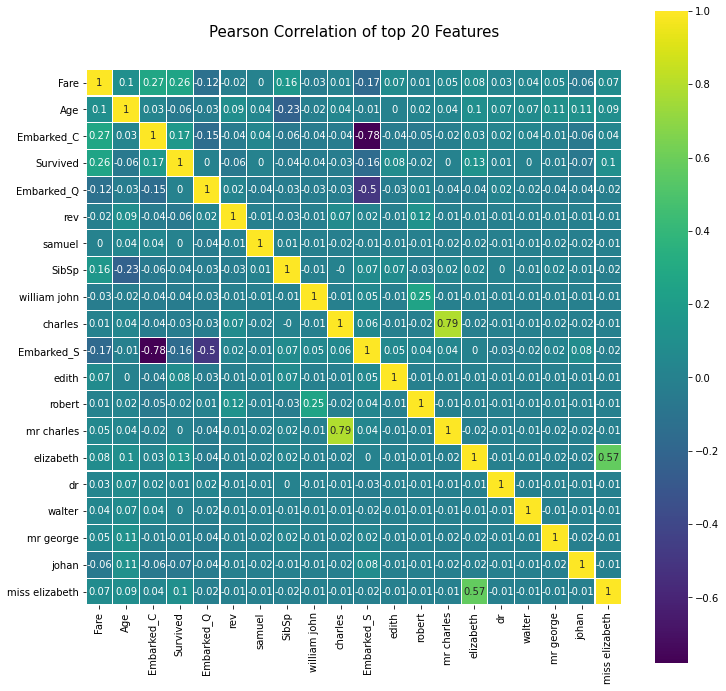

In [35]:
#View the correlation between features in our processed dataset
colormap = plt.cm.viridis
plt.figure(figsize = (12,12))
plt.title('Pearson Correlation of top 20 Features', y = 1.05, size = 15)
sns.heatmap(Train[best_col].corr().round(2)\
            ,linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, \
            linecolor = 'white', annot = True);

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Time Lapsed = 0:3:12


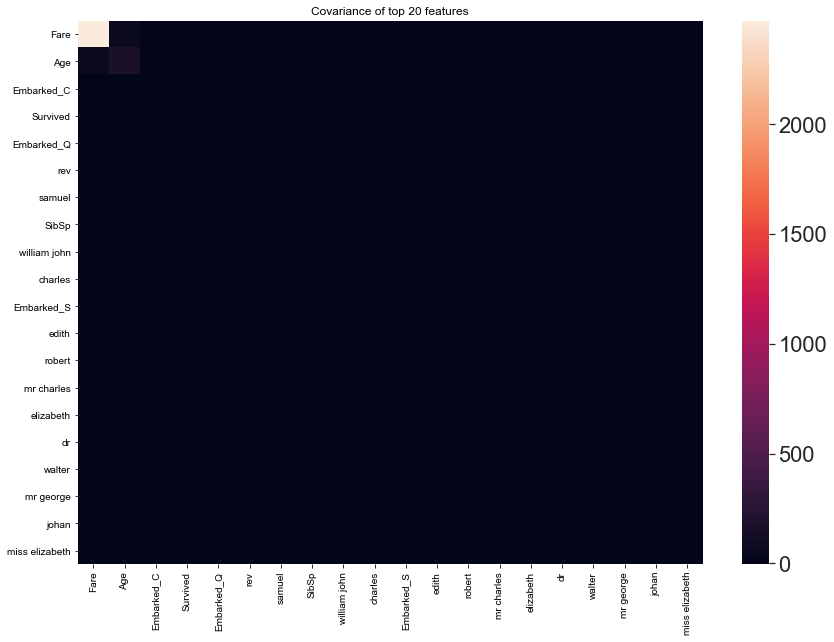

In [36]:
#Covariance Heatmap
plt.figure(figsize = (14,10))
plt.title("Covariance of top 20 features")
sns.set(font_scale = 2)
sns.heatmap(Train[best_col].cov())

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [37]:
#Pairplot of each feature
#sns.pairplot(Train.select_dtypes(exclude = 'object'))

#end = time.time()
#time_lapsed = end - start
#time_convert(time_lapsed)

In [38]:
Train = drop_columns(Train, "Name")

# VII. Pipeline Sanity Check 

In [41]:
import pandas as pd
from numpy import (
    hstack,
    reshape,
)
from great_expectations.render.renderer import ExpectationSuitePageRenderer
from great_expectations.render.view import DefaultJinjaPageView

from random_ml_models import (
    generate_random_ml_model,
    split_data_and_train_model,
    LogitModelMonitoringProfiler,
)

In [42]:
my_profiler = LogitModelMonitoringProfiler()
expectation_suite, validation_results = my_profiler.profile(
    data = Train,
)

In [43]:
document = (
    ExpectationSuitePageRenderer()
    .render(expectation_suite)
)
view = DefaultJinjaPageView().render(document)

with open('temp.html', 'w') as f_:
    f_.write(view)

In [44]:
! open temp.html

'open' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
end = time.time()

time_lapsed = end - start
time_convert(time_lapsed)

Time Lapsed = 0:4:44


# VIII. Train & Validation Split

In [46]:
# Visulization: Plot the count plot for the column user selected
print("Please enter the column name that you want as the output(label)") # Should be "Survived" in this dataset
col_name = input("Input a column name")

#Setup training, validation and testing sets 
X = Train.drop([col_name] , axis = 1)
Y = Train[col_name]

np.random.seed(1337)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Please enter the column name that you want as the output(label)
Input a column nameSurvived
(712, 114) (712,)
(179, 114) (179,)
Time Lapsed = 0:4:49


# IX. ML Models & Evaluations

1. Logistic - only for classification problem




In [47]:
# Logistic Regression
logreg = LogisticRegression(max_iter = 10000)                  # instantiate

# tuning params
kfold = 5
logreg_param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}    

logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
logreg_grid_search.fit(X_train, Y_train)

# best params
logreg_best_parameters = logreg_grid_search.best_estimator_.get_params()   
print(logreg_best_parameters)
logreg = LogisticRegression(C = logreg_best_parameters['C'], solver = logreg_best_parameters['solver'], max_iter = 10000).fit(X_train, Y_train)
logreg.fit(X_train, Y_train)                                 # fit
Y_pred_log = logreg.predict(X_val)                           # predict

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START C=0.0001, solver=newton-cg.................................
[CV 1/5; 1/40] END ...............C=0.0001, solver=newton-cg; total time=   0.0s
[CV 2/5; 1/40] START C=0.0001, solver=newton-cg.................................
[CV 2/5; 1/40] END ...............C=0.0001, solver=newton-cg; total time=   0.0s
[CV 3/5; 1/40] START C=0.0001, solver=newton-cg.................................
[CV 3/5; 1/40] END ...............C=0.0001, solver=newton-cg; total time=   0.0s
[CV 4/5; 1/40] START C=0.0001, solver=newton-cg.................................
[CV 4/5; 1/40] END ...............C=0.0001, solver=newton-cg; total time=   0.0s
[CV 5/5; 1/40] START C=0.0001, solver=newton-cg.................................
[CV 5/5; 1/40] END ...............C=0.0001, solver=newton-cg; total time=   0.0s
[CV 1/5; 2/40] START C=0.0001, solver=lbfgs.....................................
[CV 1/5; 2/40] END ...................C=0.0001,

[CV 4/5; 11/40] END ................C=0.01, solver=newton-cg; total time=   0.0s
[CV 5/5; 11/40] START C=0.01, solver=newton-cg..................................
[CV 5/5; 11/40] END ................C=0.01, solver=newton-cg; total time=   0.0s
[CV 1/5; 12/40] START C=0.01, solver=lbfgs......................................
[CV 1/5; 12/40] END ....................C=0.01, solver=lbfgs; total time=   0.1s
[CV 2/5; 12/40] START C=0.01, solver=lbfgs......................................
[CV 2/5; 12/40] END ....................C=0.01, solver=lbfgs; total time=   0.0s
[CV 3/5; 12/40] START C=0.01, solver=lbfgs......................................
[CV 3/5; 12/40] END ....................C=0.01, solver=lbfgs; total time=   0.1s
[CV 4/5; 12/40] START C=0.01, solver=lbfgs......................................
[CV 4/5; 12/40] END ....................C=0.01, solver=lbfgs; total time=   0.1s
[CV 5/5; 12/40] START C=0.01, solver=lbfgs......................................
[CV 5/5; 12/40] END ........

[CV 1/5; 22/40] END .......................C=1, solver=lbfgs; total time=   0.6s
[CV 2/5; 22/40] START C=1, solver=lbfgs.........................................
[CV 2/5; 22/40] END .......................C=1, solver=lbfgs; total time=   0.4s
[CV 3/5; 22/40] START C=1, solver=lbfgs.........................................
[CV 3/5; 22/40] END .......................C=1, solver=lbfgs; total time=   0.5s
[CV 4/5; 22/40] START C=1, solver=lbfgs.........................................
[CV 4/5; 22/40] END .......................C=1, solver=lbfgs; total time=   0.4s
[CV 5/5; 22/40] START C=1, solver=lbfgs.........................................
[CV 5/5; 22/40] END .......................C=1, solver=lbfgs; total time=   0.5s
[CV 1/5; 23/40] START C=1, solver=liblinear.....................................
[CV 1/5; 23/40] END ...................C=1, solver=liblinear; total time=   0.0s
[CV 2/5; 23/40] START C=1, solver=liblinear.....................................
[CV 2/5; 23/40] END ........

[CV 2/5; 32/40] END .....................C=100, solver=lbfgs; total time=   1.8s
[CV 3/5; 32/40] START C=100, solver=lbfgs.......................................
[CV 3/5; 32/40] END .....................C=100, solver=lbfgs; total time=   1.8s
[CV 4/5; 32/40] START C=100, solver=lbfgs.......................................
[CV 4/5; 32/40] END .....................C=100, solver=lbfgs; total time=   2.1s
[CV 5/5; 32/40] START C=100, solver=lbfgs.......................................
[CV 5/5; 32/40] END .....................C=100, solver=lbfgs; total time=   2.2s
[CV 1/5; 33/40] START C=100, solver=liblinear...................................
[CV 1/5; 33/40] END .................C=100, solver=liblinear; total time=   0.0s
[CV 2/5; 33/40] START C=100, solver=liblinear...................................
[CV 2/5; 33/40] END .................C=100, solver=liblinear; total time=   0.0s
[CV 3/5; 33/40] START C=100, solver=liblinear...................................
[CV 3/5; 33/40] END ........

In [48]:
acc_log = logreg.score(X_val, Y_val)                       # evaluate accuracy
print("\n",'Logistic Regression accuracy:', str(round(acc_log * 100, 2)), '%')

prec_log = precision_score(Y_val, Y_pred_log, zero_division = 1)   # evaluate precision
print('Logistic Regression precision score:',str(round(prec_log * 100, 2)), '%')

recall_log = recall_score(Y_val, Y_pred_log, zero_division = 1)   # evaluate recall
print('Logistic Regression recall score:', str(round(recall_log * 100, 2)), '%')

f1_log = f1_score(Y_val, Y_pred_log, zero_division = 1)    # evaluate F1 score
print('Logistic Regression F1 score:', str(round(f1_log * 100,2)), '%', "\n")

c_log = confusion_matrix(Y_val, Y_pred_log)
print('CONFUSION MATRIX:',"\n")
print('           Predicted')
print('           neg pos')
print('   Actual')
print('     neg  ', c_log[0])
print('     pos  ', c_log[1])

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)


 Logistic Regression accuracy: 82.12 %
Logistic Regression precision score: 78.46 %
Logistic Regression recall score: 73.91 %
Logistic Regression F1 score: 76.12 % 

CONFUSION MATRIX: 

           Predicted
           neg pos
   Actual
     neg   [96 14]
     pos   [18 51]
Time Lapsed = 0:10:7


2. SVM - for both classification and regression problem




In [50]:
svc = SVC(max_iter = 10000)                                   # instantiate
#svc.fit(X_train, Y_train)                                   # fit
#Y_pred_svc = svc.predict(X_val)                            # predict 

# tuning params
kfold = 5
svm_param_grid = {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                  'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                  'gamma': [0.001, 0.0001]}    

svm_grid_search = GridSearchCV(svc, svm_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
svm_grid_search.fit(X_train, Y_train)

# best params
svm_best_parameters = svm_grid_search.best_estimator_.get_params()   
svc = SVC(kernel = svm_best_parameters['kernel'], C = svm_best_parameters['C'], gamma = svm_best_parameters['gamma'], probability = True).fit(X_train, Y_train)

svc.fit(X_train, Y_train)                                   # fit
Y_pred_svc = svc.predict(X_val)                            # predict

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5; 1/56] START C=0.0001, gamma=0.001, kernel=rbf..........................
[CV 1/5; 1/56] END ........C=0.0001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5; 1/56] START C=0.0001, gamma=0.001, kernel=rbf..........................
[CV 2/5; 1/56] END ........C=0.0001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5; 1/56] START C=0.0001, gamma=0.001, kernel=rbf..........................
[CV 3/5; 1/56] END ........C=0.0001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5; 1/56] START C=0.0001, gamma=0.001, kernel=rbf..........................
[CV 4/5; 1/56] END ........C=0.0001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5; 1/56] START C=0.0001, gamma=0.001, kernel=rbf..........................
[CV 5/5; 1/56] END ........C=0.0001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5; 2/56] START C=0.0001, gamma=0.001, kernel=linear.......................
[CV 1/5; 2/56] END .....C=0.0001, gamma=0.001, 

[CV 1/5; 11/56] END .......C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5; 11/56] START C=0.001, gamma=0.001, kernel=poly.........................
[CV 2/5; 11/56] END .......C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5; 11/56] START C=0.001, gamma=0.001, kernel=poly.........................
[CV 3/5; 11/56] END .......C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV 4/5; 11/56] START C=0.001, gamma=0.001, kernel=poly.........................
[CV 4/5; 11/56] END .......C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV 5/5; 11/56] START C=0.001, gamma=0.001, kernel=poly.........................
[CV 5/5; 11/56] END .......C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV 1/5; 12/56] START C=0.001, gamma=0.001, kernel=sigmoid......................
[CV 1/5; 12/56] END ....C=0.001, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 2/5; 12/56] START C=0.001, gamma=0.001, kernel=sigmoid......................
[CV 2/5; 12/56] END ....C=0.

[CV 4/5; 21/56] END ........C=0.01, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5; 21/56] START C=0.01, gamma=0.0001, kernel=rbf..........................
[CV 5/5; 21/56] END ........C=0.01, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5; 22/56] START C=0.01, gamma=0.0001, kernel=linear.......................
[CV 1/5; 22/56] END .....C=0.01, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 2/5; 22/56] START C=0.01, gamma=0.0001, kernel=linear.......................
[CV 2/5; 22/56] END .....C=0.01, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 3/5; 22/56] START C=0.01, gamma=0.0001, kernel=linear.......................
[CV 3/5; 22/56] END .....C=0.01, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 4/5; 22/56] START C=0.01, gamma=0.0001, kernel=linear.......................
[CV 4/5; 22/56] END .....C=0.01, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 5/5; 22/56] START C=0.01, gamma=0.0001, kernel=linear.......................
[CV 5/5; 22/56] END .....C=0

[CV 5/5; 31/56] END ........C=0.1, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 1/5; 32/56] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 1/5; 32/56] END .....C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 2/5; 32/56] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 2/5; 32/56] END .....C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 3/5; 32/56] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 3/5; 32/56] END .....C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 4/5; 32/56] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 4/5; 32/56] END .....C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 5/5; 32/56] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 5/5; 32/56] END .....C=0.1, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 1/5; 33/56] START C=1, gamma=0.001, kernel=rbf..............................
[CV 1/5; 33/56] END ........

[CV 2/5; 42/56] END ........C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5; 42/56] START C=10, gamma=0.001, kernel=linear..........................
[CV 3/5; 42/56] END ........C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5; 42/56] START C=10, gamma=0.001, kernel=linear..........................
[CV 4/5; 42/56] END ........C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5; 42/56] START C=10, gamma=0.001, kernel=linear..........................
[CV 5/5; 42/56] END ........C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5; 43/56] START C=10, gamma=0.001, kernel=poly............................
[CV 1/5; 43/56] END ..........C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5; 43/56] START C=10, gamma=0.001, kernel=poly............................
[CV 2/5; 43/56] END ..........C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5; 43/56] START C=10, gamma=0.001, kernel=poly............................
[CV 3/5; 43/56] END ........

[CV 5/5; 52/56] END ......C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 1/5; 53/56] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 1/5; 53/56] END .........C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5; 53/56] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 2/5; 53/56] END .........C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5; 53/56] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 3/5; 53/56] END .........C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5; 53/56] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 4/5; 53/56] END .........C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5; 53/56] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 5/5; 53/56] END .........C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5; 54/56] START C=100, gamma=0.0001, kernel=linear........................
[CV 1/5; 54/56] END ......C=

In [51]:
# SVM Evaluation - Classification Problem
acc_svc = svc.score(X_val, Y_val)                            # evaluate accuracy
print('Support Vector Machines labeling accuracy:', str(round(acc_svc * 100, 2)), '%')

prec_svc = precision_score(Y_val, Y_pred_svc, zero_division = 1)   # evaluate precision
print('Support Vector Machines labeling precision score:',str(round(prec_svc * 100, 2)), '%')

recall_svc = recall_score(Y_val, Y_pred_svc, zero_division = 1)   # evaluate recall
print('Support Vector Machines labeling recall score:', str(round(recall_svc * 100, 2)), '%')

f1_svc = f1_score(Y_val, Y_pred_svc, zero_division = 1)    # evaluate F1 score
print('Support Vector Machines labeling F1 score:', str(round(f1_svc * 100, 2)), '%', "\n")

c_svc = confusion_matrix(Y_val, Y_pred_log)
print('CONFUSION MATRIX:',"\n")
print('           Predicted')
print('           neg pos')
print('   Actual')
print('     neg  ',c_svc[0])
print('     pos  ',c_svc[1])

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Support Vector Machines labeling accuracy: 80.45 %
Support Vector Machines labeling precision score: 75.76 %
Support Vector Machines labeling recall score: 72.46 %
Support Vector Machines labeling F1 score: 74.07 % 

CONFUSION MATRIX: 

           Predicted
           neg pos
   Actual
     neg   [96 14]
     pos   [18 51]
Time Lapsed = 0:11:34


In [ ]:
# SVM Evaluation - Regression Problem

#Support Vector Machines evaluation
print('Support Vector Machines Absolute Error:', mean_absolute_error(Y_val, Y_pred_svc))
print('Support Vector Machines Mean Squared Error:', mean_squared_error(Y_val, Y_pred_svc))
print('Support Vector Machines Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_val, Y_pred_svc)))

#Random Forest evaluation in its original values before log transform
if log_transformed == True:
    print("\noriginal values")
    print('Support Vector Machines Mean Absolute Error:', mean_absolute_error(np.exp(Y_val), np.exp(Y_pred_svc)))
    print('Support Vector Machines Mean Squared Error:', mean_squared_error(np.exp(Y_val), np.exp(Y_pred_svc)))
    print('Support Vector Machines Root Mean Squared Error:', np.sqrt(mean_squared_error(np.exp(Y_val), np.exp(Y_pred_svc))))
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

3. KNN classifer - only for classification problem




In [52]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate

# tuning params
kfold = 5
knn_param_grid = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                  'leaf_size': [1, 2, 5, 10, 20, 30, 40, 50], 
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}    

knn_grid_search = GridSearchCV(knn, knn_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
knn_grid_search.fit(X_train, Y_train)

# best params
knn_best_parameters = knn_grid_search.best_estimator_.get_params()   
knn = KNeighborsClassifier(n_neighbors = knn_best_parameters['n_neighbors'], 
                           leaf_size = knn_best_parameters['leaf_size'], 
                           algorithm = knn_best_parameters['algorithm']).fit(X_train, Y_train)

knn.fit(X_train, Y_train)                                   # fit
Y_pred_knn = knn.predict(X_val)                            # predict

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5; 1/384] START algorithm=auto, leaf_size=1, n_neighbors=2................
[CV 1/5; 1/384] END algorithm=auto, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 2/5; 1/384] START algorithm=auto, leaf_size=1, n_neighbors=2................
[CV 2/5; 1/384] END algorithm=auto, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 3/5; 1/384] START algorithm=auto, leaf_size=1, n_neighbors=2................
[CV 3/5; 1/384] END algorithm=auto, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 4/5; 1/384] START algorithm=auto, leaf_size=1, n_neighbors=2................
[CV 4/5; 1/384] END algorithm=auto, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 5/5; 1/384] START algorithm=auto, leaf_size=1, n_neighbors=2................
[CV 5/5; 1/384] END algorithm=auto, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 1/5; 2/384] START algorithm=auto, leaf_size=1, n_neighbors=3................
[CV 1/5; 2/384] END algorithm=auto,

[CV 2/5; 11/384] END algorithm=auto, leaf_size=1, n_neighbors=12; total time=   0.0s
[CV 3/5; 11/384] START algorithm=auto, leaf_size=1, n_neighbors=12..............
[CV 3/5; 11/384] END algorithm=auto, leaf_size=1, n_neighbors=12; total time=   0.0s
[CV 4/5; 11/384] START algorithm=auto, leaf_size=1, n_neighbors=12..............
[CV 4/5; 11/384] END algorithm=auto, leaf_size=1, n_neighbors=12; total time=   0.0s
[CV 5/5; 11/384] START algorithm=auto, leaf_size=1, n_neighbors=12..............
[CV 5/5; 11/384] END algorithm=auto, leaf_size=1, n_neighbors=12; total time=   0.0s
[CV 1/5; 12/384] START algorithm=auto, leaf_size=1, n_neighbors=13..............
[CV 1/5; 12/384] END algorithm=auto, leaf_size=1, n_neighbors=13; total time=   0.0s
[CV 2/5; 12/384] START algorithm=auto, leaf_size=1, n_neighbors=13..............
[CV 2/5; 12/384] END algorithm=auto, leaf_size=1, n_neighbors=13; total time=   0.0s
[CV 3/5; 12/384] START algorithm=auto, leaf_size=1, n_neighbors=13..............
[CV 

[CV 5/5; 21/384] END algorithm=auto, leaf_size=2, n_neighbors=10; total time=   0.0s
[CV 1/5; 22/384] START algorithm=auto, leaf_size=2, n_neighbors=11..............
[CV 1/5; 22/384] END algorithm=auto, leaf_size=2, n_neighbors=11; total time=   0.0s
[CV 2/5; 22/384] START algorithm=auto, leaf_size=2, n_neighbors=11..............
[CV 2/5; 22/384] END algorithm=auto, leaf_size=2, n_neighbors=11; total time=   0.0s
[CV 3/5; 22/384] START algorithm=auto, leaf_size=2, n_neighbors=11..............
[CV 3/5; 22/384] END algorithm=auto, leaf_size=2, n_neighbors=11; total time=   0.0s
[CV 4/5; 22/384] START algorithm=auto, leaf_size=2, n_neighbors=11..............
[CV 4/5; 22/384] END algorithm=auto, leaf_size=2, n_neighbors=11; total time=   0.0s
[CV 5/5; 22/384] START algorithm=auto, leaf_size=2, n_neighbors=11..............
[CV 5/5; 22/384] END algorithm=auto, leaf_size=2, n_neighbors=11; total time=   0.0s
[CV 1/5; 23/384] START algorithm=auto, leaf_size=2, n_neighbors=12..............
[CV 

[CV 1/5; 32/384] END algorithm=auto, leaf_size=5, n_neighbors=9; total time=   0.0s
[CV 2/5; 32/384] START algorithm=auto, leaf_size=5, n_neighbors=9...............
[CV 2/5; 32/384] END algorithm=auto, leaf_size=5, n_neighbors=9; total time=   0.0s
[CV 3/5; 32/384] START algorithm=auto, leaf_size=5, n_neighbors=9...............
[CV 3/5; 32/384] END algorithm=auto, leaf_size=5, n_neighbors=9; total time=   0.0s
[CV 4/5; 32/384] START algorithm=auto, leaf_size=5, n_neighbors=9...............
[CV 4/5; 32/384] END algorithm=auto, leaf_size=5, n_neighbors=9; total time=   0.0s
[CV 5/5; 32/384] START algorithm=auto, leaf_size=5, n_neighbors=9...............
[CV 5/5; 32/384] END algorithm=auto, leaf_size=5, n_neighbors=9; total time=   0.0s
[CV 1/5; 33/384] START algorithm=auto, leaf_size=5, n_neighbors=10..............
[CV 1/5; 33/384] END algorithm=auto, leaf_size=5, n_neighbors=10; total time=   0.0s
[CV 2/5; 33/384] START algorithm=auto, leaf_size=5, n_neighbors=10..............
[CV 2/5; 

[CV 3/5; 42/384] END algorithm=auto, leaf_size=10, n_neighbors=7; total time=   0.0s
[CV 4/5; 42/384] START algorithm=auto, leaf_size=10, n_neighbors=7..............
[CV 4/5; 42/384] END algorithm=auto, leaf_size=10, n_neighbors=7; total time=   0.0s
[CV 5/5; 42/384] START algorithm=auto, leaf_size=10, n_neighbors=7..............
[CV 5/5; 42/384] END algorithm=auto, leaf_size=10, n_neighbors=7; total time=   0.0s
[CV 1/5; 43/384] START algorithm=auto, leaf_size=10, n_neighbors=8..............
[CV 1/5; 43/384] END algorithm=auto, leaf_size=10, n_neighbors=8; total time=   0.0s
[CV 2/5; 43/384] START algorithm=auto, leaf_size=10, n_neighbors=8..............
[CV 2/5; 43/384] END algorithm=auto, leaf_size=10, n_neighbors=8; total time=   0.0s
[CV 3/5; 43/384] START algorithm=auto, leaf_size=10, n_neighbors=8..............
[CV 3/5; 43/384] END algorithm=auto, leaf_size=10, n_neighbors=8; total time=   0.0s
[CV 4/5; 43/384] START algorithm=auto, leaf_size=10, n_neighbors=8..............
[CV 

[CV 1/5; 53/384] END algorithm=auto, leaf_size=20, n_neighbors=6; total time=   0.0s
[CV 2/5; 53/384] START algorithm=auto, leaf_size=20, n_neighbors=6..............
[CV 2/5; 53/384] END algorithm=auto, leaf_size=20, n_neighbors=6; total time=   0.0s
[CV 3/5; 53/384] START algorithm=auto, leaf_size=20, n_neighbors=6..............
[CV 3/5; 53/384] END algorithm=auto, leaf_size=20, n_neighbors=6; total time=   0.0s
[CV 4/5; 53/384] START algorithm=auto, leaf_size=20, n_neighbors=6..............
[CV 4/5; 53/384] END algorithm=auto, leaf_size=20, n_neighbors=6; total time=   0.0s
[CV 5/5; 53/384] START algorithm=auto, leaf_size=20, n_neighbors=6..............
[CV 5/5; 53/384] END algorithm=auto, leaf_size=20, n_neighbors=6; total time=   0.0s
[CV 1/5; 54/384] START algorithm=auto, leaf_size=20, n_neighbors=7..............
[CV 1/5; 54/384] END algorithm=auto, leaf_size=20, n_neighbors=7; total time=   0.0s
[CV 2/5; 54/384] START algorithm=auto, leaf_size=20, n_neighbors=7..............
[CV 

[CV 1/5; 63/384] END algorithm=auto, leaf_size=30, n_neighbors=4; total time=   0.0s
[CV 2/5; 63/384] START algorithm=auto, leaf_size=30, n_neighbors=4..............
[CV 2/5; 63/384] END algorithm=auto, leaf_size=30, n_neighbors=4; total time=   0.0s
[CV 3/5; 63/384] START algorithm=auto, leaf_size=30, n_neighbors=4..............
[CV 3/5; 63/384] END algorithm=auto, leaf_size=30, n_neighbors=4; total time=   0.0s
[CV 4/5; 63/384] START algorithm=auto, leaf_size=30, n_neighbors=4..............
[CV 4/5; 63/384] END algorithm=auto, leaf_size=30, n_neighbors=4; total time=   0.0s
[CV 5/5; 63/384] START algorithm=auto, leaf_size=30, n_neighbors=4..............
[CV 5/5; 63/384] END algorithm=auto, leaf_size=30, n_neighbors=4; total time=   0.0s
[CV 1/5; 64/384] START algorithm=auto, leaf_size=30, n_neighbors=5..............
[CV 1/5; 64/384] END algorithm=auto, leaf_size=30, n_neighbors=5; total time=   0.0s
[CV 2/5; 64/384] START algorithm=auto, leaf_size=30, n_neighbors=5..............
[CV 

[CV 1/5; 73/384] END algorithm=auto, leaf_size=40, n_neighbors=2; total time=   0.0s
[CV 2/5; 73/384] START algorithm=auto, leaf_size=40, n_neighbors=2..............
[CV 2/5; 73/384] END algorithm=auto, leaf_size=40, n_neighbors=2; total time=   0.0s
[CV 3/5; 73/384] START algorithm=auto, leaf_size=40, n_neighbors=2..............
[CV 3/5; 73/384] END algorithm=auto, leaf_size=40, n_neighbors=2; total time=   0.0s
[CV 4/5; 73/384] START algorithm=auto, leaf_size=40, n_neighbors=2..............
[CV 4/5; 73/384] END algorithm=auto, leaf_size=40, n_neighbors=2; total time=   0.0s
[CV 5/5; 73/384] START algorithm=auto, leaf_size=40, n_neighbors=2..............
[CV 5/5; 73/384] END algorithm=auto, leaf_size=40, n_neighbors=2; total time=   0.0s
[CV 1/5; 74/384] START algorithm=auto, leaf_size=40, n_neighbors=3..............
[CV 1/5; 74/384] END algorithm=auto, leaf_size=40, n_neighbors=3; total time=   0.0s
[CV 2/5; 74/384] START algorithm=auto, leaf_size=40, n_neighbors=3..............
[CV 

[CV 1/5; 83/384] END algorithm=auto, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 2/5; 83/384] START algorithm=auto, leaf_size=40, n_neighbors=12.............
[CV 2/5; 83/384] END algorithm=auto, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 3/5; 83/384] START algorithm=auto, leaf_size=40, n_neighbors=12.............
[CV 3/5; 83/384] END algorithm=auto, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 4/5; 83/384] START algorithm=auto, leaf_size=40, n_neighbors=12.............
[CV 4/5; 83/384] END algorithm=auto, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 5/5; 83/384] START algorithm=auto, leaf_size=40, n_neighbors=12.............
[CV 5/5; 83/384] END algorithm=auto, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 1/5; 84/384] START algorithm=auto, leaf_size=40, n_neighbors=13.............
[CV 1/5; 84/384] END algorithm=auto, leaf_size=40, n_neighbors=13; total time=   0.0s
[CV 2/5; 84/384] START algorithm=auto, leaf_size=40, n_neighbors=13............

[CV 5/5; 92/384] END algorithm=auto, leaf_size=50, n_neighbors=9; total time=   0.0s
[CV 1/5; 93/384] START algorithm=auto, leaf_size=50, n_neighbors=10.............
[CV 1/5; 93/384] END algorithm=auto, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 2/5; 93/384] START algorithm=auto, leaf_size=50, n_neighbors=10.............
[CV 2/5; 93/384] END algorithm=auto, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 3/5; 93/384] START algorithm=auto, leaf_size=50, n_neighbors=10.............
[CV 3/5; 93/384] END algorithm=auto, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 4/5; 93/384] START algorithm=auto, leaf_size=50, n_neighbors=10.............
[CV 4/5; 93/384] END algorithm=auto, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 5/5; 93/384] START algorithm=auto, leaf_size=50, n_neighbors=10.............
[CV 5/5; 93/384] END algorithm=auto, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 1/5; 94/384] START algorithm=auto, leaf_size=50, n_neighbors=11.............

[CV 5/5; 102/384] END algorithm=ball_tree, leaf_size=1, n_neighbors=7; total time=   0.0s
[CV 1/5; 103/384] START algorithm=ball_tree, leaf_size=1, n_neighbors=8.........
[CV 1/5; 103/384] END algorithm=ball_tree, leaf_size=1, n_neighbors=8; total time=   0.0s
[CV 2/5; 103/384] START algorithm=ball_tree, leaf_size=1, n_neighbors=8.........
[CV 2/5; 103/384] END algorithm=ball_tree, leaf_size=1, n_neighbors=8; total time=   0.0s
[CV 3/5; 103/384] START algorithm=ball_tree, leaf_size=1, n_neighbors=8.........
[CV 3/5; 103/384] END algorithm=ball_tree, leaf_size=1, n_neighbors=8; total time=   0.0s
[CV 4/5; 103/384] START algorithm=ball_tree, leaf_size=1, n_neighbors=8.........
[CV 4/5; 103/384] END algorithm=ball_tree, leaf_size=1, n_neighbors=8; total time=   0.0s
[CV 5/5; 103/384] START algorithm=ball_tree, leaf_size=1, n_neighbors=8.........
[CV 5/5; 103/384] END algorithm=ball_tree, leaf_size=1, n_neighbors=8; total time=   0.0s
[CV 1/5; 104/384] START algorithm=ball_tree, leaf_size=

[CV 1/5; 113/384] END algorithm=ball_tree, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 2/5; 113/384] START algorithm=ball_tree, leaf_size=2, n_neighbors=6.........
[CV 2/5; 113/384] END algorithm=ball_tree, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 3/5; 113/384] START algorithm=ball_tree, leaf_size=2, n_neighbors=6.........
[CV 3/5; 113/384] END algorithm=ball_tree, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 4/5; 113/384] START algorithm=ball_tree, leaf_size=2, n_neighbors=6.........
[CV 4/5; 113/384] END algorithm=ball_tree, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 5/5; 113/384] START algorithm=ball_tree, leaf_size=2, n_neighbors=6.........
[CV 5/5; 113/384] END algorithm=ball_tree, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 1/5; 114/384] START algorithm=ball_tree, leaf_size=2, n_neighbors=7.........
[CV 1/5; 114/384] END algorithm=ball_tree, leaf_size=2, n_neighbors=7; total time=   0.0s
[CV 2/5; 114/384] START algorithm=ball_tree, leaf_size=

[CV 2/5; 123/384] END algorithm=ball_tree, leaf_size=5, n_neighbors=4; total time=   0.0s
[CV 3/5; 123/384] START algorithm=ball_tree, leaf_size=5, n_neighbors=4.........
[CV 3/5; 123/384] END algorithm=ball_tree, leaf_size=5, n_neighbors=4; total time=   0.0s
[CV 4/5; 123/384] START algorithm=ball_tree, leaf_size=5, n_neighbors=4.........
[CV 4/5; 123/384] END algorithm=ball_tree, leaf_size=5, n_neighbors=4; total time=   0.0s
[CV 5/5; 123/384] START algorithm=ball_tree, leaf_size=5, n_neighbors=4.........
[CV 5/5; 123/384] END algorithm=ball_tree, leaf_size=5, n_neighbors=4; total time=   0.0s
[CV 1/5; 124/384] START algorithm=ball_tree, leaf_size=5, n_neighbors=5.........
[CV 1/5; 124/384] END algorithm=ball_tree, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 2/5; 124/384] START algorithm=ball_tree, leaf_size=5, n_neighbors=5.........
[CV 2/5; 124/384] END algorithm=ball_tree, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 3/5; 124/384] START algorithm=ball_tree, leaf_size=

[CV 3/5; 133/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV 4/5; 133/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=2........
[CV 4/5; 133/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV 5/5; 133/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=2........
[CV 5/5; 133/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV 1/5; 134/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=3........
[CV 1/5; 134/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=3; total time=   0.0s
[CV 2/5; 134/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=3........
[CV 2/5; 134/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=3; total time=   0.0s
[CV 3/5; 134/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=3........
[CV 3/5; 134/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=3; total time=   0.0s
[CV 4/5; 134/384] START algorithm=ball_tree, leaf

[CV 2/5; 143/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=12; total time=   0.0s
[CV 3/5; 143/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=12.......
[CV 3/5; 143/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=12; total time=   0.0s
[CV 4/5; 143/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=12.......
[CV 4/5; 143/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=12; total time=   0.0s
[CV 5/5; 143/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=12.......
[CV 5/5; 143/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=12; total time=   0.0s
[CV 1/5; 144/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=13.......
[CV 1/5; 144/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=13; total time=   0.0s
[CV 2/5; 144/384] START algorithm=ball_tree, leaf_size=10, n_neighbors=13.......
[CV 2/5; 144/384] END algorithm=ball_tree, leaf_size=10, n_neighbors=13; total time=   0.0s
[CV 3/5; 144/384] START algorithm=ball_tree

[CV 1/5; 153/384] END algorithm=ball_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 2/5; 153/384] START algorithm=ball_tree, leaf_size=20, n_neighbors=10.......
[CV 2/5; 153/384] END algorithm=ball_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 3/5; 153/384] START algorithm=ball_tree, leaf_size=20, n_neighbors=10.......
[CV 3/5; 153/384] END algorithm=ball_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 4/5; 153/384] START algorithm=ball_tree, leaf_size=20, n_neighbors=10.......
[CV 4/5; 153/384] END algorithm=ball_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 5/5; 153/384] START algorithm=ball_tree, leaf_size=20, n_neighbors=10.......
[CV 5/5; 153/384] END algorithm=ball_tree, leaf_size=20, n_neighbors=10; total time=   0.0s
[CV 1/5; 154/384] START algorithm=ball_tree, leaf_size=20, n_neighbors=11.......
[CV 1/5; 154/384] END algorithm=ball_tree, leaf_size=20, n_neighbors=11; total time=   0.0s
[CV 2/5; 154/384] START algorithm=ball_tree

[CV 2/5; 163/384] END algorithm=ball_tree, leaf_size=30, n_neighbors=8; total time=   0.0s
[CV 3/5; 163/384] START algorithm=ball_tree, leaf_size=30, n_neighbors=8........
[CV 3/5; 163/384] END algorithm=ball_tree, leaf_size=30, n_neighbors=8; total time=   0.0s
[CV 4/5; 163/384] START algorithm=ball_tree, leaf_size=30, n_neighbors=8........
[CV 4/5; 163/384] END algorithm=ball_tree, leaf_size=30, n_neighbors=8; total time=   0.0s
[CV 5/5; 163/384] START algorithm=ball_tree, leaf_size=30, n_neighbors=8........
[CV 5/5; 163/384] END algorithm=ball_tree, leaf_size=30, n_neighbors=8; total time=   0.0s
[CV 1/5; 164/384] START algorithm=ball_tree, leaf_size=30, n_neighbors=9........
[CV 1/5; 164/384] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 2/5; 164/384] START algorithm=ball_tree, leaf_size=30, n_neighbors=9........
[CV 2/5; 164/384] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 3/5; 164/384] START algorithm=ball_tree, leaf

[CV 1/5; 173/384] END algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.0s
[CV 2/5; 173/384] START algorithm=ball_tree, leaf_size=40, n_neighbors=6........
[CV 2/5; 173/384] END algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.0s
[CV 3/5; 173/384] START algorithm=ball_tree, leaf_size=40, n_neighbors=6........
[CV 3/5; 173/384] END algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.0s
[CV 4/5; 173/384] START algorithm=ball_tree, leaf_size=40, n_neighbors=6........
[CV 4/5; 173/384] END algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.0s
[CV 5/5; 173/384] START algorithm=ball_tree, leaf_size=40, n_neighbors=6........
[CV 5/5; 173/384] END algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.0s
[CV 1/5; 174/384] START algorithm=ball_tree, leaf_size=40, n_neighbors=7........
[CV 1/5; 174/384] END algorithm=ball_tree, leaf_size=40, n_neighbors=7; total time=   0.0s
[CV 2/5; 174/384] START algorithm=ball_tree, leaf

[CV 5/5; 182/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=3; total time=   0.0s
[CV 1/5; 183/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=4........
[CV 1/5; 183/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV 2/5; 183/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=4........
[CV 2/5; 183/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV 3/5; 183/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=4........
[CV 3/5; 183/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV 4/5; 183/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=4........
[CV 4/5; 183/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV 5/5; 183/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=4........
[CV 5/5; 183/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV 1/5; 184/384] START algorithm=ball_tree, leaf

[CV 3/5; 192/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=13; total time=   0.0s
[CV 4/5; 192/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=13.......
[CV 4/5; 192/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=13; total time=   0.0s
[CV 5/5; 192/384] START algorithm=ball_tree, leaf_size=50, n_neighbors=13.......
[CV 5/5; 192/384] END algorithm=ball_tree, leaf_size=50, n_neighbors=13; total time=   0.0s
[CV 1/5; 193/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=2...........
[CV 1/5; 193/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 2/5; 193/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=2...........
[CV 2/5; 193/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 3/5; 193/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=2...........
[CV 3/5; 193/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=2; total time=   0.0s
[CV 4/5; 193/384] START algorithm=kd_tree, leaf_size=1,

[CV 2/5; 202/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=11; total time=   0.0s
[CV 3/5; 202/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=11..........
[CV 3/5; 202/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=11; total time=   0.0s
[CV 4/5; 202/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=11..........
[CV 4/5; 202/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=11; total time=   0.0s
[CV 5/5; 202/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=11..........
[CV 5/5; 202/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=11; total time=   0.0s
[CV 1/5; 203/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=12..........
[CV 1/5; 203/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=12; total time=   0.0s
[CV 2/5; 203/384] START algorithm=kd_tree, leaf_size=1, n_neighbors=12..........
[CV 2/5; 203/384] END algorithm=kd_tree, leaf_size=1, n_neighbors=12; total time=   0.0s
[CV 3/5; 203/384] START algorithm=kd_tree, leaf_size=1, n_nei

[CV 2/5; 212/384] END algorithm=kd_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV 3/5; 212/384] START algorithm=kd_tree, leaf_size=2, n_neighbors=9...........
[CV 3/5; 212/384] END algorithm=kd_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV 4/5; 212/384] START algorithm=kd_tree, leaf_size=2, n_neighbors=9...........
[CV 4/5; 212/384] END algorithm=kd_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV 5/5; 212/384] START algorithm=kd_tree, leaf_size=2, n_neighbors=9...........
[CV 5/5; 212/384] END algorithm=kd_tree, leaf_size=2, n_neighbors=9; total time=   0.0s
[CV 1/5; 213/384] START algorithm=kd_tree, leaf_size=2, n_neighbors=10..........
[CV 1/5; 213/384] END algorithm=kd_tree, leaf_size=2, n_neighbors=10; total time=   0.0s
[CV 2/5; 213/384] START algorithm=kd_tree, leaf_size=2, n_neighbors=10..........
[CV 2/5; 213/384] END algorithm=kd_tree, leaf_size=2, n_neighbors=10; total time=   0.0s
[CV 3/5; 213/384] START algorithm=kd_tree, leaf_size=2, n_neighbo

[CV 1/5; 222/384] END algorithm=kd_tree, leaf_size=5, n_neighbors=7; total time=   0.0s
[CV 2/5; 222/384] START algorithm=kd_tree, leaf_size=5, n_neighbors=7...........
[CV 2/5; 222/384] END algorithm=kd_tree, leaf_size=5, n_neighbors=7; total time=   0.0s
[CV 3/5; 222/384] START algorithm=kd_tree, leaf_size=5, n_neighbors=7...........
[CV 3/5; 222/384] END algorithm=kd_tree, leaf_size=5, n_neighbors=7; total time=   0.0s
[CV 4/5; 222/384] START algorithm=kd_tree, leaf_size=5, n_neighbors=7...........
[CV 4/5; 222/384] END algorithm=kd_tree, leaf_size=5, n_neighbors=7; total time=   0.0s
[CV 5/5; 222/384] START algorithm=kd_tree, leaf_size=5, n_neighbors=7...........
[CV 5/5; 222/384] END algorithm=kd_tree, leaf_size=5, n_neighbors=7; total time=   0.0s
[CV 1/5; 223/384] START algorithm=kd_tree, leaf_size=5, n_neighbors=8...........
[CV 1/5; 223/384] END algorithm=kd_tree, leaf_size=5, n_neighbors=8; total time=   0.0s
[CV 2/5; 223/384] START algorithm=kd_tree, leaf_size=5, n_neighbors

[CV 2/5; 232/384] END algorithm=kd_tree, leaf_size=10, n_neighbors=5; total time=   0.0s
[CV 3/5; 232/384] START algorithm=kd_tree, leaf_size=10, n_neighbors=5..........
[CV 3/5; 232/384] END algorithm=kd_tree, leaf_size=10, n_neighbors=5; total time=   0.0s
[CV 4/5; 232/384] START algorithm=kd_tree, leaf_size=10, n_neighbors=5..........
[CV 4/5; 232/384] END algorithm=kd_tree, leaf_size=10, n_neighbors=5; total time=   0.0s
[CV 5/5; 232/384] START algorithm=kd_tree, leaf_size=10, n_neighbors=5..........
[CV 5/5; 232/384] END algorithm=kd_tree, leaf_size=10, n_neighbors=5; total time=   0.0s
[CV 1/5; 233/384] START algorithm=kd_tree, leaf_size=10, n_neighbors=6..........
[CV 1/5; 233/384] END algorithm=kd_tree, leaf_size=10, n_neighbors=6; total time=   0.0s
[CV 2/5; 233/384] START algorithm=kd_tree, leaf_size=10, n_neighbors=6..........
[CV 2/5; 233/384] END algorithm=kd_tree, leaf_size=10, n_neighbors=6; total time=   0.0s
[CV 3/5; 233/384] START algorithm=kd_tree, leaf_size=10, n_ne

[CV 4/5; 242/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 5/5; 242/384] START algorithm=kd_tree, leaf_size=20, n_neighbors=3..........
[CV 5/5; 242/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 1/5; 243/384] START algorithm=kd_tree, leaf_size=20, n_neighbors=4..........
[CV 1/5; 243/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=4; total time=   0.0s
[CV 2/5; 243/384] START algorithm=kd_tree, leaf_size=20, n_neighbors=4..........
[CV 2/5; 243/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=4; total time=   0.0s
[CV 3/5; 243/384] START algorithm=kd_tree, leaf_size=20, n_neighbors=4..........
[CV 3/5; 243/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=4; total time=   0.0s
[CV 4/5; 243/384] START algorithm=kd_tree, leaf_size=20, n_neighbors=4..........
[CV 4/5; 243/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=4; total time=   0.0s
[CV 5/5; 243/384] START algorithm=kd_tree, leaf_size=20, n_ne

[CV 5/5; 252/384] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 1/5; 253/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=2..........
[CV 1/5; 253/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 2/5; 253/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=2..........
[CV 2/5; 253/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 3/5; 253/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=2..........
[CV 3/5; 253/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 4/5; 253/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=2..........
[CV 4/5; 253/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 5/5; 253/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=2..........
[CV 5/5; 253/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 1/5; 254/384] START algorithm=kd_tree, leaf_size=30, n_n

[CV 1/5; 263/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 2/5; 263/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=12.........
[CV 2/5; 263/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 3/5; 263/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=12.........
[CV 3/5; 263/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 4/5; 263/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=12.........
[CV 4/5; 263/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 5/5; 263/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=12.........
[CV 5/5; 263/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 1/5; 264/384] START algorithm=kd_tree, leaf_size=30, n_neighbors=13.........
[CV 1/5; 264/384] END algorithm=kd_tree, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 2/5; 264/384] START algorithm=kd_tree, leaf_size=30

[CV 1/5; 273/384] END algorithm=kd_tree, leaf_size=40, n_neighbors=10; total time=   0.0s
[CV 2/5; 273/384] START algorithm=kd_tree, leaf_size=40, n_neighbors=10.........
[CV 2/5; 273/384] END algorithm=kd_tree, leaf_size=40, n_neighbors=10; total time=   0.0s
[CV 3/5; 273/384] START algorithm=kd_tree, leaf_size=40, n_neighbors=10.........
[CV 3/5; 273/384] END algorithm=kd_tree, leaf_size=40, n_neighbors=10; total time=   0.0s
[CV 4/5; 273/384] START algorithm=kd_tree, leaf_size=40, n_neighbors=10.........
[CV 4/5; 273/384] END algorithm=kd_tree, leaf_size=40, n_neighbors=10; total time=   0.0s
[CV 5/5; 273/384] START algorithm=kd_tree, leaf_size=40, n_neighbors=10.........
[CV 5/5; 273/384] END algorithm=kd_tree, leaf_size=40, n_neighbors=10; total time=   0.0s
[CV 1/5; 274/384] START algorithm=kd_tree, leaf_size=40, n_neighbors=11.........
[CV 1/5; 274/384] END algorithm=kd_tree, leaf_size=40, n_neighbors=11; total time=   0.0s
[CV 2/5; 274/384] START algorithm=kd_tree, leaf_size=40

[CV 1/5; 283/384] END algorithm=kd_tree, leaf_size=50, n_neighbors=8; total time=   0.0s
[CV 2/5; 283/384] START algorithm=kd_tree, leaf_size=50, n_neighbors=8..........
[CV 2/5; 283/384] END algorithm=kd_tree, leaf_size=50, n_neighbors=8; total time=   0.0s
[CV 3/5; 283/384] START algorithm=kd_tree, leaf_size=50, n_neighbors=8..........
[CV 3/5; 283/384] END algorithm=kd_tree, leaf_size=50, n_neighbors=8; total time=   0.0s
[CV 4/5; 283/384] START algorithm=kd_tree, leaf_size=50, n_neighbors=8..........
[CV 4/5; 283/384] END algorithm=kd_tree, leaf_size=50, n_neighbors=8; total time=   0.0s
[CV 5/5; 283/384] START algorithm=kd_tree, leaf_size=50, n_neighbors=8..........
[CV 5/5; 283/384] END algorithm=kd_tree, leaf_size=50, n_neighbors=8; total time=   0.0s
[CV 1/5; 284/384] START algorithm=kd_tree, leaf_size=50, n_neighbors=9..........
[CV 1/5; 284/384] END algorithm=kd_tree, leaf_size=50, n_neighbors=9; total time=   0.0s
[CV 2/5; 284/384] START algorithm=kd_tree, leaf_size=50, n_ne

[CV 5/5; 293/384] END algorithm=brute, leaf_size=1, n_neighbors=6; total time=   0.0s
[CV 1/5; 294/384] START algorithm=brute, leaf_size=1, n_neighbors=7.............
[CV 1/5; 294/384] END algorithm=brute, leaf_size=1, n_neighbors=7; total time=   0.0s
[CV 2/5; 294/384] START algorithm=brute, leaf_size=1, n_neighbors=7.............
[CV 2/5; 294/384] END algorithm=brute, leaf_size=1, n_neighbors=7; total time=   0.0s
[CV 3/5; 294/384] START algorithm=brute, leaf_size=1, n_neighbors=7.............
[CV 3/5; 294/384] END algorithm=brute, leaf_size=1, n_neighbors=7; total time=   0.0s
[CV 4/5; 294/384] START algorithm=brute, leaf_size=1, n_neighbors=7.............
[CV 4/5; 294/384] END algorithm=brute, leaf_size=1, n_neighbors=7; total time=   0.0s
[CV 5/5; 294/384] START algorithm=brute, leaf_size=1, n_neighbors=7.............
[CV 5/5; 294/384] END algorithm=brute, leaf_size=1, n_neighbors=7; total time=   0.0s
[CV 1/5; 295/384] START algorithm=brute, leaf_size=1, n_neighbors=8............

[CV 5/5; 304/384] END algorithm=brute, leaf_size=2, n_neighbors=5; total time=   0.0s
[CV 1/5; 305/384] START algorithm=brute, leaf_size=2, n_neighbors=6.............
[CV 1/5; 305/384] END algorithm=brute, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 2/5; 305/384] START algorithm=brute, leaf_size=2, n_neighbors=6.............
[CV 2/5; 305/384] END algorithm=brute, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 3/5; 305/384] START algorithm=brute, leaf_size=2, n_neighbors=6.............
[CV 3/5; 305/384] END algorithm=brute, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 4/5; 305/384] START algorithm=brute, leaf_size=2, n_neighbors=6.............
[CV 4/5; 305/384] END algorithm=brute, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 5/5; 305/384] START algorithm=brute, leaf_size=2, n_neighbors=6.............
[CV 5/5; 305/384] END algorithm=brute, leaf_size=2, n_neighbors=6; total time=   0.0s
[CV 1/5; 306/384] START algorithm=brute, leaf_size=2, n_neighbors=7............

[CV 5/5; 315/384] END algorithm=brute, leaf_size=5, n_neighbors=4; total time=   0.0s
[CV 1/5; 316/384] START algorithm=brute, leaf_size=5, n_neighbors=5.............
[CV 1/5; 316/384] END algorithm=brute, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 2/5; 316/384] START algorithm=brute, leaf_size=5, n_neighbors=5.............
[CV 2/5; 316/384] END algorithm=brute, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 3/5; 316/384] START algorithm=brute, leaf_size=5, n_neighbors=5.............
[CV 3/5; 316/384] END algorithm=brute, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 4/5; 316/384] START algorithm=brute, leaf_size=5, n_neighbors=5.............
[CV 4/5; 316/384] END algorithm=brute, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 5/5; 316/384] START algorithm=brute, leaf_size=5, n_neighbors=5.............
[CV 5/5; 316/384] END algorithm=brute, leaf_size=5, n_neighbors=5; total time=   0.0s
[CV 1/5; 317/384] START algorithm=brute, leaf_size=5, n_neighbors=6............

[CV 1/5; 327/384] END algorithm=brute, leaf_size=10, n_neighbors=4; total time=   0.0s
[CV 2/5; 327/384] START algorithm=brute, leaf_size=10, n_neighbors=4............
[CV 2/5; 327/384] END algorithm=brute, leaf_size=10, n_neighbors=4; total time=   0.0s
[CV 3/5; 327/384] START algorithm=brute, leaf_size=10, n_neighbors=4............
[CV 3/5; 327/384] END algorithm=brute, leaf_size=10, n_neighbors=4; total time=   0.0s
[CV 4/5; 327/384] START algorithm=brute, leaf_size=10, n_neighbors=4............
[CV 4/5; 327/384] END algorithm=brute, leaf_size=10, n_neighbors=4; total time=   0.0s
[CV 5/5; 327/384] START algorithm=brute, leaf_size=10, n_neighbors=4............
[CV 5/5; 327/384] END algorithm=brute, leaf_size=10, n_neighbors=4; total time=   0.0s
[CV 1/5; 328/384] START algorithm=brute, leaf_size=10, n_neighbors=5............
[CV 1/5; 328/384] END algorithm=brute, leaf_size=10, n_neighbors=5; total time=   0.0s
[CV 2/5; 328/384] START algorithm=brute, leaf_size=10, n_neighbors=5.....

[CV 2/5; 338/384] END algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 3/5; 338/384] START algorithm=brute, leaf_size=20, n_neighbors=3............
[CV 3/5; 338/384] END algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 4/5; 338/384] START algorithm=brute, leaf_size=20, n_neighbors=3............
[CV 4/5; 338/384] END algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 5/5; 338/384] START algorithm=brute, leaf_size=20, n_neighbors=3............
[CV 5/5; 338/384] END algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 1/5; 339/384] START algorithm=brute, leaf_size=20, n_neighbors=4............
[CV 1/5; 339/384] END algorithm=brute, leaf_size=20, n_neighbors=4; total time=   0.0s
[CV 2/5; 339/384] START algorithm=brute, leaf_size=20, n_neighbors=4............
[CV 2/5; 339/384] END algorithm=brute, leaf_size=20, n_neighbors=4; total time=   0.0s
[CV 3/5; 339/384] START algorithm=brute, leaf_size=20, n_neighbors=4.....

[CV 1/5; 349/384] END algorithm=brute, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 2/5; 349/384] START algorithm=brute, leaf_size=30, n_neighbors=2............
[CV 2/5; 349/384] END algorithm=brute, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 3/5; 349/384] START algorithm=brute, leaf_size=30, n_neighbors=2............
[CV 3/5; 349/384] END algorithm=brute, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 4/5; 349/384] START algorithm=brute, leaf_size=30, n_neighbors=2............
[CV 4/5; 349/384] END algorithm=brute, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 5/5; 349/384] START algorithm=brute, leaf_size=30, n_neighbors=2............
[CV 5/5; 349/384] END algorithm=brute, leaf_size=30, n_neighbors=2; total time=   0.0s
[CV 1/5; 350/384] START algorithm=brute, leaf_size=30, n_neighbors=3............
[CV 1/5; 350/384] END algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 2/5; 350/384] START algorithm=brute, leaf_size=30, n_neighbors=3.....

[CV 5/5; 359/384] END algorithm=brute, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 1/5; 360/384] START algorithm=brute, leaf_size=30, n_neighbors=13...........
[CV 1/5; 360/384] END algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 2/5; 360/384] START algorithm=brute, leaf_size=30, n_neighbors=13...........
[CV 2/5; 360/384] END algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 3/5; 360/384] START algorithm=brute, leaf_size=30, n_neighbors=13...........
[CV 3/5; 360/384] END algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 4/5; 360/384] START algorithm=brute, leaf_size=30, n_neighbors=13...........
[CV 4/5; 360/384] END algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 5/5; 360/384] START algorithm=brute, leaf_size=30, n_neighbors=13...........
[CV 5/5; 360/384] END algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 1/5; 361/384] START algorithm=brute, leaf_size=40, n_neighbors=

[CV 1/5; 371/384] START algorithm=brute, leaf_size=40, n_neighbors=12...........
[CV 1/5; 371/384] END algorithm=brute, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 2/5; 371/384] START algorithm=brute, leaf_size=40, n_neighbors=12...........
[CV 2/5; 371/384] END algorithm=brute, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 3/5; 371/384] START algorithm=brute, leaf_size=40, n_neighbors=12...........
[CV 3/5; 371/384] END algorithm=brute, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 4/5; 371/384] START algorithm=brute, leaf_size=40, n_neighbors=12...........
[CV 4/5; 371/384] END algorithm=brute, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 5/5; 371/384] START algorithm=brute, leaf_size=40, n_neighbors=12...........
[CV 5/5; 371/384] END algorithm=brute, leaf_size=40, n_neighbors=12; total time=   0.0s
[CV 1/5; 372/384] START algorithm=brute, leaf_size=40, n_neighbors=13...........
[CV 1/5; 372/384] END algorithm=brute, leaf_size=40, n_neighbors=13; total

[CV 3/5; 381/384] END algorithm=brute, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 4/5; 381/384] START algorithm=brute, leaf_size=50, n_neighbors=10...........
[CV 4/5; 381/384] END algorithm=brute, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 5/5; 381/384] START algorithm=brute, leaf_size=50, n_neighbors=10...........
[CV 5/5; 381/384] END algorithm=brute, leaf_size=50, n_neighbors=10; total time=   0.0s
[CV 1/5; 382/384] START algorithm=brute, leaf_size=50, n_neighbors=11...........
[CV 1/5; 382/384] END algorithm=brute, leaf_size=50, n_neighbors=11; total time=   0.0s
[CV 2/5; 382/384] START algorithm=brute, leaf_size=50, n_neighbors=11...........
[CV 2/5; 382/384] END algorithm=brute, leaf_size=50, n_neighbors=11; total time=   0.0s
[CV 3/5; 382/384] START algorithm=brute, leaf_size=50, n_neighbors=11...........
[CV 3/5; 382/384] END algorithm=brute, leaf_size=50, n_neighbors=11; total time=   0.0s
[CV 4/5; 382/384] START algorithm=brute, leaf_size=50, n_neighbors=

In [53]:
# KNN Evaluation - Classification Problem 
acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate
print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn * 100, 2)), '%')

prec_knn = precision_score(Y_val, Y_pred_knn, zero_division = 1)   # evaluate precision
print('K-Nearest Neighbors labeling precision score:',str(round(prec_knn * 100, 2)), '%')

recall_knn = recall_score(Y_val, Y_pred_knn, zero_division = 1)   # evaluate recall
print('K-Nearest Neighbors labeling recall score:', str(round(recall_knn * 100, 2)), '%')

f1_knn = f1_score(Y_val, Y_pred_knn, zero_division = 1)    # evaluate F1 score
print('K-Nearest Neighbors labeling F1 score:', str(round(f1_knn * 100, 2)), '%', "\n")

c_knn = confusion_matrix(Y_val, Y_pred_knn)
print('CONFUSION MATRIX:',"\n")
print('           Predicted')
print('           neg pos')
print('   Actual')
print('     neg  ',c_knn[0])
print('     pos  ',c_knn[1])

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

K-Nearest Neighbors labeling accuracy: 70.95 %
K-Nearest Neighbors labeling precision score: 66.67 %
K-Nearest Neighbors labeling recall score: 49.28 %
K-Nearest Neighbors labeling F1 score: 56.67 % 

CONFUSION MATRIX: 

           Predicted
           neg pos
   Actual
     neg   [93 17]
     pos   [35 34]
Time Lapsed = 0:12:56


4. KNN regressor - only for regression problem

In [ ]:
# KNN Evaluation - Regression Problem 
knn_re = neighbors.KNeighborsRegressor(n_neighbors = 3)
kfold = 10
knn_param_grid = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13],
                  'leaf_size': [1,2,5,10,20,30,40,50], 
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}    

knn_grid_search = GridSearchCV(knn_re, knn_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
knn_grid_search.fit(X_train, Y_train)

# best params
knn_best_parameters = knn_grid_search.best_estimator_.get_params()   
knn_re = KNeighborsClassifier(n_neighbors = knn_best_parameters['n_neighbors'], 
                           leaf_size = knn_best_parameters['leaf_size'], 
                           algorithm = knn_best_parameters['algorithm']).fit(X_train, Y_train)

knn_re.fit(X_train, Y_train)                                   # fit
Y_pred_knn_re = knn_re.predict(X_val) 

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [ ]:
rmse_val = []
smallest_error = np.inf
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    model.fit(X_train, Y_train)  #fit the model
    pred_reg = model.predict(X_val) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_val, pred_reg)) #calculate rmse
    if error < smallest_error:
        smallest_error = error
        best_model = model
        Y_pred_knn_re = pred_reg
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ', k ,'is:', error)
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [ ]:
#KNN Regressor Evaluation

#Decision Tree Evaluation
print('KNN regressor Mean Absolute Error:', mean_absolute_error(Y_val, Y_pred_knn_re))
print('KNN regressor Mean Squared Error:', mean_squared_error(Y_val, Y_pred_knn_re ))
print('KNN regressor Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_val, Y_pred_knn_re)))

#Decision Tree Evaluation in its original values before log transform
if log_transformed == True:
    print("\noriginal values")
    print('KNN regressor Mean Absolute Error:', mean_absolute_error(np.exp(Y_val), np.exp(Y_pred_knn_re)))
    print('KNN regressor Mean Squared Error:', mean_squared_error(np.exp(Y_val), np.exp(Y_pred_knn_re)))
    print('KNN regressor Root Mean Squared Error:', np.sqrt(mean_squared_error(np.exp(Y_val), np.exp(Y_pred_knn_re))))
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

5. Random Forest Classifier - only for classification problem



In [54]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_cla = RandomForestClassifier(n_estimators = 500, random_state = 0)
 
# tuning params
kfold = 5
random_forest_param_grid = {'n_estimators':[1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                            'max_features': ['auto', 'sqrt', 'log2']}    

random_forest_grid_search = GridSearchCV(rf_cla, random_forest_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
random_forest_grid_search.fit(X_train, Y_train)

# best params
random_forest_best_parameters = random_forest_grid_search.best_estimator_.get_params()   
rf_cla = RandomForestClassifier(n_estimators = random_forest_best_parameters['n_estimators'], max_features = random_forest_best_parameters['max_features']).fit(X_train, Y_train)
rf_cla.fit(X_train, Y_train)
rf_cla_pred = rf_cla.predict(X_val)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5; 1/39] START max_features=auto, n_estimators=1..........................
[CV 1/5; 1/39] END ........max_features=auto, n_estimators=1; total time=   0.0s
[CV 2/5; 1/39] START max_features=auto, n_estimators=1..........................
[CV 2/5; 1/39] END ........max_features=auto, n_estimators=1; total time=   0.0s
[CV 3/5; 1/39] START max_features=auto, n_estimators=1..........................
[CV 3/5; 1/39] END ........max_features=auto, n_estimators=1; total time=   0.0s
[CV 4/5; 1/39] START max_features=auto, n_estimators=1..........................
[CV 4/5; 1/39] END ........max_features=auto, n_estimators=1; total time=   0.0s
[CV 5/5; 1/39] START max_features=auto, n_estimators=1..........................
[CV 5/5; 1/39] END ........max_features=auto, n_estimators=1; total time=   0.0s
[CV 1/5; 2/39] START max_features=auto, n_estimators=10.........................
[CV 1/5; 2/39] END .......max_features=auto, n_

[CV 1/5; 11/39] END .....max_features=auto, n_estimators=800; total time=   2.2s
[CV 2/5; 11/39] START max_features=auto, n_estimators=800.......................
[CV 2/5; 11/39] END .....max_features=auto, n_estimators=800; total time=   2.0s
[CV 3/5; 11/39] START max_features=auto, n_estimators=800.......................
[CV 3/5; 11/39] END .....max_features=auto, n_estimators=800; total time=   2.0s
[CV 4/5; 11/39] START max_features=auto, n_estimators=800.......................
[CV 4/5; 11/39] END .....max_features=auto, n_estimators=800; total time=   2.6s
[CV 5/5; 11/39] START max_features=auto, n_estimators=800.......................
[CV 5/5; 11/39] END .....max_features=auto, n_estimators=800; total time=   2.0s
[CV 1/5; 12/39] START max_features=auto, n_estimators=900.......................
[CV 1/5; 12/39] END .....max_features=auto, n_estimators=900; total time=   2.3s
[CV 2/5; 12/39] START max_features=auto, n_estimators=900.......................
[CV 2/5; 12/39] END .....max

[CV 2/5; 21/39] END .....max_features=sqrt, n_estimators=500; total time=   1.3s
[CV 3/5; 21/39] START max_features=sqrt, n_estimators=500.......................
[CV 3/5; 21/39] END .....max_features=sqrt, n_estimators=500; total time=   1.3s
[CV 4/5; 21/39] START max_features=sqrt, n_estimators=500.......................
[CV 4/5; 21/39] END .....max_features=sqrt, n_estimators=500; total time=   1.2s
[CV 5/5; 21/39] START max_features=sqrt, n_estimators=500.......................
[CV 5/5; 21/39] END .....max_features=sqrt, n_estimators=500; total time=   1.2s
[CV 1/5; 22/39] START max_features=sqrt, n_estimators=600.......................
[CV 1/5; 22/39] END .....max_features=sqrt, n_estimators=600; total time=   1.5s
[CV 2/5; 22/39] START max_features=sqrt, n_estimators=600.......................
[CV 2/5; 22/39] END .....max_features=sqrt, n_estimators=600; total time=   1.5s
[CV 3/5; 22/39] START max_features=sqrt, n_estimators=600.......................
[CV 3/5; 22/39] END .....max

[CV 3/5; 31/39] END .....max_features=log2, n_estimators=200; total time=   0.4s
[CV 4/5; 31/39] START max_features=log2, n_estimators=200.......................
[CV 4/5; 31/39] END .....max_features=log2, n_estimators=200; total time=   0.6s
[CV 5/5; 31/39] START max_features=log2, n_estimators=200.......................
[CV 5/5; 31/39] END .....max_features=log2, n_estimators=200; total time=   0.6s
[CV 1/5; 32/39] START max_features=log2, n_estimators=300.......................
[CV 1/5; 32/39] END .....max_features=log2, n_estimators=300; total time=   0.7s
[CV 2/5; 32/39] START max_features=log2, n_estimators=300.......................
[CV 2/5; 32/39] END .....max_features=log2, n_estimators=300; total time=   0.7s
[CV 3/5; 32/39] START max_features=log2, n_estimators=300.......................
[CV 3/5; 32/39] END .....max_features=log2, n_estimators=300; total time=   0.7s
[CV 4/5; 32/39] START max_features=log2, n_estimators=300.......................
[CV 4/5; 32/39] END .....max

In [55]:
#Random Forest Classifier Evaluation
acc_rf_cla = rf_cla.score(X_val, Y_val)                            # predict + evaluate
print('Random Forest Classifier labeling accuracy:', str(round(acc_rf_cla * 100, 2)), '%')

prec_rf_cla = precision_score(Y_val, rf_cla_pred, zero_division = 1)   # evaluate precision
print('Random Forest Classifier labeling precision score:',str(round(prec_rf_cla * 100, 2)), '%')

recall_rf_cla = recall_score(Y_val, rf_cla_pred, zero_division = 1)   # evaluate recall
print('Random Forest Classifier recall score:', str(round(recall_rf_cla * 100, 2)), '%')

f1_rf_cla = f1_score(Y_val, rf_cla_pred, zero_division = 1)    # evaluate F1 score
print('Random Forest Classifier labeling F1 score:', str(round(f1_rf_cla * 100, 2)), '%', "\n")

c_rf_cla = confusion_matrix(Y_val, rf_cla_pred)
print('CONFUSION MATRIX:',"\n")
print('           Predicted')
print('           neg pos')
print('   Actual')
print('     neg  ',c_rf_cla[0])
print('     pos  ',c_rf_cla[1])

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Random Forest Classifier labeling accuracy: 82.68 %
Random Forest Classifier labeling precision score: 82.76 %
Random Forest Classifier recall score: 69.57 %
Random Forest Classifier labeling F1 score: 75.59 % 

CONFUSION MATRIX: 

           Predicted
           neg pos
   Actual
     neg   [100  10]
     pos   [21 48]
Time Lapsed = 0:17:54


6. Random Forest Regressor - only for regression problem




In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 200, random_state = 0)

# tuning params
kfold = 10
random_forest_param_grid = {'n_estimators':[1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                            'max_features': ['auto', 'sqrt', 'log2']}    

random_forest_grid_search = GridSearchCV(rf_reg, random_forest_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
random_forest_grid_search.fit(X_train, Y_train)

# best params
random_forest_best_parameters = random_forest_grid_search.best_estimator_.get_params()   
rf_reg = RandomForestRegressor(n_estimators = random_forest_best_parameters['n_estimators'], max_features = random_forest_best_parameters['max_features']).fit(X_train, Y_train)
rf_reg.fit(X_train, Y_train)
rf_reg_pred = rf_reg.predict(X_val)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [ ]:
#Random Forest Regressor evaluation
print('Random Forest Mean Absolute Error:', mean_absolute_error(Y_val, rf_reg_pred))
print('Mean Squared Error:', mean_squared_error(Y_val, rf_reg_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_val, rf_reg_pred)))

#Random Forest evaluation in its original values before log transform
if log_transformed == True:
    print("\noriginal values")
    print('Random Forest Mean Absolute Error:', mean_absolute_error(np.exp(Y_val), np.exp(rf_reg_pred)))
    print('Mean Squared Error:', mean_squared_error(np.exp(Y_val), np.exp(rf_reg_pred)))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(np.exp(Y_val), np.exp(rf_reg_pred))))
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

7. Decision Tree Classifier - for only classification problem





In [56]:
#Decision Tree Classifier
decision_tree_cla = DecisionTreeClassifier(max_depth = 5)
#decision_tree_cla.fit(X_train, Y_train)
#dt_pred = decision_tree.predict(X_val) 

# tuning params
kfold = 10
decision_tree_param_grid = {'max_depth':[1, 5, 10, 50, 100, 200],
                            'criterion': ['gini', 'entropy']}    

decision_tree_grid_search = GridSearchCV(decision_tree_cla, decision_tree_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
decision_tree_grid_search.fit(X_train, Y_train)

# best params
decision_tree_best_parameters = decision_tree_grid_search.best_estimator_.get_params()   
decision_tree_cla = DecisionTreeClassifier(max_depth = decision_tree_best_parameters['max_depth'], criterion = decision_tree_best_parameters['criterion']).fit(X_train, Y_train)
decision_tree_cla.fit(X_train, Y_train)
dt_cla_pred = decision_tree_cla.predict(X_val)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START criterion=gini, max_depth=1...............................
[CV 1/10; 1/12] END .............criterion=gini, max_depth=1; total time=   0.0s
[CV 2/10; 1/12] START criterion=gini, max_depth=1...............................
[CV 2/10; 1/12] END .............criterion=gini, max_depth=1; total time=   0.0s
[CV 3/10; 1/12] START criterion=gini, max_depth=1...............................
[CV 3/10; 1/12] END .............criterion=gini, max_depth=1; total time=   0.0s
[CV 4/10; 1/12] START criterion=gini, max_depth=1...............................
[CV 4/10; 1/12] END .............criterion=gini, max_depth=1; total time=   0.0s
[CV 5/10; 1/12] START criterion=gini, max_depth=1...............................
[CV 5/10; 1/12] END .............criterion=gini, max_depth=1; total time=   0.0s
[CV 6/10; 1/12] START criterion=gini, max_depth=1...............................
[CV 6/10; 1/12] END .............criterion=gin

[CV 7/10; 6/12] END ...........criterion=gini, max_depth=200; total time=   0.0s
[CV 8/10; 6/12] START criterion=gini, max_depth=200.............................
[CV 8/10; 6/12] END ...........criterion=gini, max_depth=200; total time=   0.0s
[CV 9/10; 6/12] START criterion=gini, max_depth=200.............................
[CV 9/10; 6/12] END ...........criterion=gini, max_depth=200; total time=   0.0s
[CV 10/10; 6/12] START criterion=gini, max_depth=200............................
[CV 10/10; 6/12] END ..........criterion=gini, max_depth=200; total time=   0.0s
[CV 1/10; 7/12] START criterion=entropy, max_depth=1............................
[CV 1/10; 7/12] END ..........criterion=entropy, max_depth=1; total time=   0.0s
[CV 2/10; 7/12] START criterion=entropy, max_depth=1............................
[CV 2/10; 7/12] END ..........criterion=entropy, max_depth=1; total time=   0.0s
[CV 3/10; 7/12] START criterion=entropy, max_depth=1............................
[CV 3/10; 7/12] END ........

[CV 9/10; 11/12] END .......criterion=entropy, max_depth=100; total time=   0.0s
[CV 10/10; 11/12] START criterion=entropy, max_depth=100........................
[CV 10/10; 11/12] END ......criterion=entropy, max_depth=100; total time=   0.0s
[CV 1/10; 12/12] START criterion=entropy, max_depth=200.........................
[CV 1/10; 12/12] END .......criterion=entropy, max_depth=200; total time=   0.0s
[CV 2/10; 12/12] START criterion=entropy, max_depth=200.........................
[CV 2/10; 12/12] END .......criterion=entropy, max_depth=200; total time=   0.0s
[CV 3/10; 12/12] START criterion=entropy, max_depth=200.........................
[CV 3/10; 12/12] END .......criterion=entropy, max_depth=200; total time=   0.0s
[CV 4/10; 12/12] START criterion=entropy, max_depth=200.........................
[CV 4/10; 12/12] END .......criterion=entropy, max_depth=200; total time=   0.0s
[CV 5/10; 12/12] START criterion=entropy, max_depth=200.........................
[CV 5/10; 12/12] END .......

In [57]:
#Decision Tree Classifier Evaluation
acc_dt_cla = decision_tree_cla.score(X_val, Y_val)                            # predict + evaluate
print('Decision Tree Classifier labeling accuracy:', str(round(acc_dt_cla * 100, 2)), '%')

prec_dt_cla = precision_score(Y_val, dt_cla_pred, zero_division = 1)   # evaluate precision
print('Decision Tree Classifier labeling precision score:',str(round(prec_dt_cla * 100, 2)), '%')
recall_dt_cla = recall_score(Y_val, dt_cla_pred, zero_division = 1)   # evaluate recall
print('Decision Tree Classifier recall score:', str(round(recall_dt_cla * 100, 2)), '%')
f1_dt_cla = f1_score(Y_val, dt_cla_pred, zero_division = 1)    # evaluate F1 score
print('Decision Tree Classifier labeling F1 score:', str(round(f1_dt_cla * 100, 2)), '%', "\n")
c_dt_cla = confusion_matrix(Y_val, dt_cla_pred,)
print('CONFUSION MATRIX:',"\n")
print('           Predicted')
print('           neg pos')
print('   Actual')
print('     neg  ',c_dt_cla[0])
print('     pos  ',c_dt_cla[1])

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Decision Tree Classifier labeling accuracy: 78.77 %
Decision Tree Classifier labeling precision score: 73.13 %
Decision Tree Classifier recall score: 71.01 %
Decision Tree Classifier labeling F1 score: 72.06 % 

CONFUSION MATRIX: 

           Predicted
           neg pos
   Actual
     neg   [92 18]
     pos   [20 49]
Time Lapsed = 0:18:24


8. Decision Tree Regressor - for only Regression problem





In [ ]:
#Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth = 5)

# tuning params
kfold = 10
decision_tree_param_grid = {'max_depth':[1, 5, 10, 50, 100, 200],
                            'criterion': ['mse', 'friedman_mse', 'mae']}    

decision_tree_grid_search = GridSearchCV(decision_tree, decision_tree_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
decision_tree_grid_search.fit(X_train, Y_train)

# best params
decision_tree_best_parameters = decision_tree_grid_search.best_estimator_.get_params()   
decision_tree = DecisionTreeRegressor(max_depth = decision_tree_best_parameters['max_depth'], criterion = decision_tree_best_parameters['criterion']).fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
dt_pred = decision_tree.predict(X_val)

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [ ]:
#Decision Tree Regressor Evaluation
print('Decision Tree Mean Absolute Error:', mean_absolute_error(Y_val, dt_pred))
print('Decision Tree Mean Squared Error:', mean_squared_error(Y_val, dt_pred))
print('Decision Tree Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_val, dt_pred)))

#Decision Tree Evaluation in its original values before log transform
if log_transformed == True:
    print("\noriginal values")
    print('Decision Tree Mean Absolute Error:', mean_absolute_error(np.exp(Y_val), np.exp(dt_pred)))
    print('Decision Tree Mean Squared Error:', mean_squared_error(np.exp(Y_val), np.exp(dt_pred)))
    print('Decision Tree Root Mean Squared Error:', np.sqrt(mean_squared_error(np.exp(Y_val), np.exp(dt_pred))))
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

9. Linear Regression




In [ ]:
# Instantiate a regression object
lr = LinearRegression()

# tuning params
kfold = 10
lr_param_grid = {'normalize':[True, False]}    

lr_grid_search = GridSearchCV(lr, lr_param_grid, n_jobs = 1, verbose = 10, cv = kfold)    
lr_grid_search.fit(X_train, Y_train)

# best params
lr_best_parameters = lr_grid_search.best_estimator_.get_params()   
lr = LinearRegression(normalize = lr_best_parameters['normalize']).fit(X_train, Y_train)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_val) 

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [ ]:
#Linear Regression Evaluation
print('Linear Regression Mean Absolute Error:', mean_absolute_error(Y_val, lr_pred))
print('Linear Regression Mean Squared Error:', mean_squared_error(Y_val, lr_pred))
print('Linear Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_val, lr_pred)))

#Linear Regression Evaluation in its original values before log transform
if log_transformed == True:
    print("\noriginal values")
    print('Linear Regression Absolute Error:', mean_absolute_error(np.exp(Y_val), np.exp(lr_pred)))
    print('Linear Regression Squared Error:', mean_squared_error(np.exp(Y_val), np.exp(lr_pred)))
    print('Linear Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(np.exp(Y_val), np.exp(lr_pred))))
    
end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

# X. Visualize Results 

In [58]:
# the class for drawing comparison metrics
class Storage:
    def __init__(self):
        self.store = pd.DataFrame()
        self.num_of_algorithms = 0
        self.store_regression = pd.DataFrame()
        self.num_of_algorithms_regression = 0
    def add_one_algorithm(self, acc, prec, recall, fl, algorithm = "logistic"):
        self.store[algorithm] = [acc, prec, recall, fl]
        self.num_of_algorithms += 1
        self.store.rename(index = {0 : 'acc', 1 : 'prec', 2 : 'recall', 3 : 'f1'}, inplace = True)
    def set_num(self, num):
        self.num_of_algorithms = num
    def draw_statistic(self):
        name_list = list(self.store.columns)
        x = list(range(len(name_list)))
        total_width, n = 0.8, 4
        width = total_width / n

        plt.bar(x,np.array(self.store.loc['acc']), width = width, label = 'acc', fc = 'y')
        for i in range(len(x)):
            x[i] = x[i] + width
        plt.bar(x, np.array(self.store.loc['prec']), width = width, tick_label = name_list, label = 'prec',fc = 'r')
        for i in range(len(x)):
            x[i] = x[i] + width
        plt.bar(x, np.array(self.store.loc['recall']), width = width, label = 'recall',fc = 'b')
        for i in range(len(x)):
            x[i] = x[i] + width
        plt.bar(x, np.array(self.store.loc['f1']), width = width, label = 'f1',fc = 'g')
        plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
        plt.show()
    def add_one_algorithm_re(self, mae, mse, rmse, algorithm = "logistic"):
        self.store_regression[algorithm] = [mae, mse, rmse]
        self.num_of_algorithms_regression += 1
        self.store_regression.rename(index = {0 : 'MAE', 1 : 'MSE', 2 : 'RMSE'}, inplace = True)
    
    def draw_statistic_re(self):
        name_list = list(self.store_regression.columns)
        x =list(range(len(name_list)))
        total_width, n = 0.8, 3
        width = total_width / n

        plt.bar(x,np.array(self.store_regression.loc['MAE']), width = width, label = 'MAE', fc = 'y')
        for i in range(len(x)):
            x[i] = x[i] + width
        plt.bar(x, np.array(self.store_regression.loc['MSE']), width = width, tick_label = name_list, label = 'MSE',fc = 'r')
        for i in range(len(x)):
            x[i] = x[i] + width
        plt.bar(x, np.array(self.store_regression.loc['RMSE']), width = width, label = 'RMSE', fc = 'b')
        plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
        plt.show()

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

Time Lapsed = 0:18:45


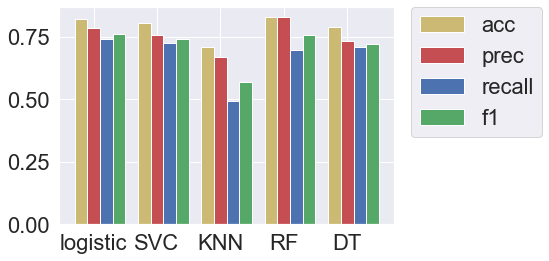

Time Lapsed = 0:18:56


In [59]:
#Draw statistic for classification models
# Logistic instantiation 
store = Storage()
store.add_one_algorithm(acc_log, prec_log, recall_log, f1_log, algorithm = "logistic")

# SVC instantiation 
store.add_one_algorithm(acc_svc, prec_svc, recall_svc, f1_svc, algorithm = "SVC")

# KNN instantiation 
store.add_one_algorithm(acc_knn, prec_knn, recall_knn, f1_knn, algorithm = "KNN")

# RF Classifier instantiation 
store.add_one_algorithm(acc_rf_cla, prec_rf_cla, recall_rf_cla, f1_rf_cla, algorithm = "RF")

# Decision Tree Classifier instantiation 
store.add_one_algorithm(acc_dt_cla, prec_dt_cla, recall_dt_cla, f1_dt_cla, algorithm = "DT")

# Visualize Result
store.draw_statistic()


# store.add_one_algorithm_re(100,200,300,algorithm="Random_Forest")
# store.add_one_algorithm_re(100,200,300,algorithm="Decision_Tree_Evalution")

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)

In [ ]:
#Draw statistic for regression models
store = Storage()
#SVC instantiation
store.add_one_algorithm_re(mean_absolute_error(Y_val, Y_pred_svc), mean_squared_error(Y_val, Y_pred_svc), np.sqrt(mean_squared_error(Y_val, Y_pred_svc)), algorithm = "SVC")

#KNN regressor instantiation
store.add_one_algorithm_re(mean_absolute_error(Y_val, Y_pred_knn_re), mean_squared_error(Y_val, Y_pred_knn_re), np.sqrt(mean_squared_error(Y_val, Y_pred_knn_re)), algorithm = "KNN")

# Random Forest instantiation 
store.add_one_algorithm_re(mean_absolute_error(Y_val, rf_reg_pred), mean_squared_error(Y_val, rf_reg_pred), np.sqrt(mean_squared_error(Y_val, rf_reg_pred)), algorithm = "RF")

# Decision Tree instantiation
store.add_one_algorithm_re(mean_absolute_error(Y_val, dt_pred), mean_squared_error(Y_val, dt_pred), np.sqrt(mean_squared_error(Y_val, dt_pred)), algorithm = "DT")

#Linear Regression instantiation
#store.add_one_algorithm_re(mean_absolute_error(Y_val, lr_pred), mean_squared_error(Y_val, lr_pred), np.sqrt(mean_squared_error(Y_val, lr_pred)), algorithm = "Linear_Regression")

# draw the metrices comparison of regression models
store.draw_statistic_re()

end = time.time()
time_lapsed = end - start
time_convert(time_lapsed)